In [1]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
 

import acquire as a
import prepare as p
import wrangle as w
import explore as exp
import evaluate as eva
import pretty as muah
import knear as k

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
def read_csv_file():
    df = pd.read_csv('combined_wine_data.csv')
    return df

df = read_csv_file()
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
0      8.8        6  White      1  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
4      9.9        6  White      1

In [3]:
df['bound_sulfur_dioxide'] = (df.total_sulfur_dioxide - df.free_sulfur_dioxide)
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
6492     10.5        5    Red      0                  12.0  
6493     11.2        6    Red      0                  12.0  
6494     11.0        6    Red      0                  11.0  
6495     10.2        5    Red      0                  12.0  
6496     11.0        6    Red      0                  24.0  

[6497 rows x 15 columns]

In [4]:
df_white = df[df['Type'] == 'White']
df_white

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
4893     11.2        6  White      1                  68.0  
4894      9.6        5  White      1                 111.0  
4895      9.4        6  White      1                  81.0  
4896     12.8        7  White      1                  90.0  
4897     11.8        6  White      1                  76.0  

[4898 rows x 15 columns]

# Prepare

In [5]:
df_red = df[df['Type']=='Red']
df_red

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4898            7.4             0.700         0.00             1.9      0.076   
4899            7.8             0.880         0.00             2.6      0.098   
4900            7.8             0.760         0.04             2.3      0.092   
4901           11.2             0.280         0.56             1.9      0.075   
4902            7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4898                 11.0                  34.0  0.99780  3.51       0.56   
4899                 25.0                  67.0  0.99680  3.20       0.68   
4900                 15.0                  54.0  0.99700  3.26       0.65   
4901                 17.0                  60.0  0.99800  3.16       0.58   
4902                 11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality Type  White  bound_sulfur_dioxide  
4898      9.4        5  Red      0                  23.0  
4899      9.8        5  Red      0                  42.0  
4900      9.8        5  Red      0                  39.0  
4901      9.8        6  Red      0                  43.0  
4902      9.4        5  Red      0                  23.0  
...       ...      ...  ...    ...                   ...  
6492     10.5        5  Red      0                  12.0  
6493     11.2        6  Red      0                  12.0  
6494     11.0        6  Red      0                  11.0  
6495     10.2        5  Red      0                  12.0  
6496     11.0        6  Red      0                  24.0  

[1599 rows x 15 columns]

- fixed_acidity  
    - Corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.
        - Units of measure: pH scale 0-14
- volatile_acidity	
    - Corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.
        - Units of measure: 0.xx g/100mL
- citric_acid
    - 'Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability'.
        - Units of measure: 0.xx g/L
- residual_sugar
    - Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.
        - Units of measure: Grams
- chlorides	
    - In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride5. Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall taste and quality of the wine.
        - Units of measure: Percentage of volume
- free_sulfur_dioxide
    - Sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. 
        - Units of measure: mg/L
- total_sulfur_dioxide	
    - The portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
        - Units of measure: mg/L
- density	
    - Is the mass per unit volume of wine or must at 20°C. 
        - Units of measure: g/mL, and denoted by the symbol $p$ 20°C.
- ph
    - Typically, the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.
        - Units of measure: pH scale 0-14
- sulphates	(sulphite)
    - Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. While they're found in many foods and beverages, they're particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache.
        - Units of measure: mg/L
- alcohol	
    - The alcohol content by percent in wine
        - Units of measure: ABV(alcohol percentage by volume)
- quality	
    - The quality rating of the wine 1-10
        - Units of measure: Scale 1-10, 1 being the worst, and 10 is best
- Type
    - Whether the wine is red or white

In [6]:
#check shape
df_white.shape

(4898, 15)

#### Summarize the DataFrame

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  Whit

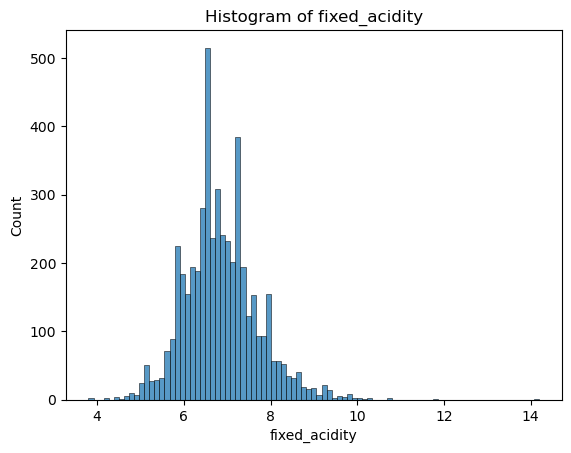

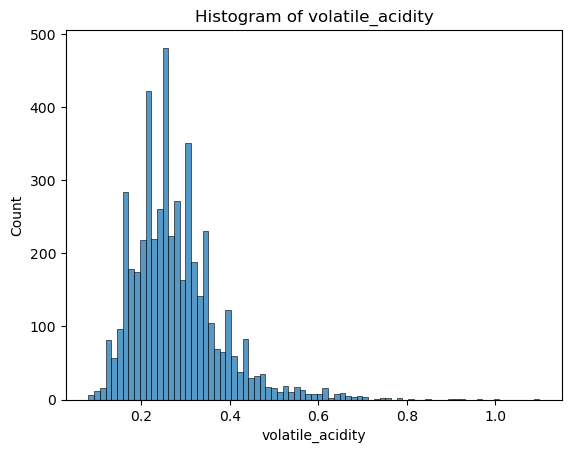

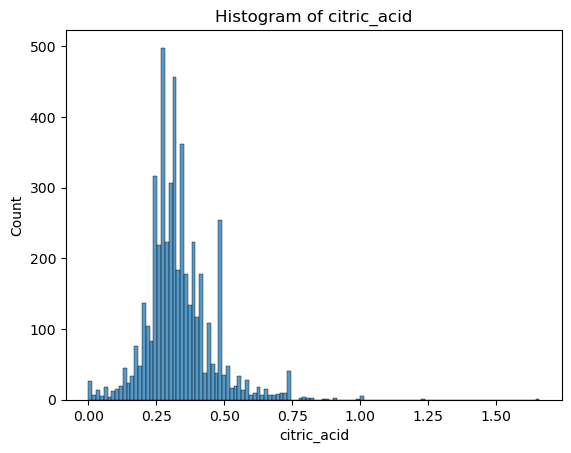

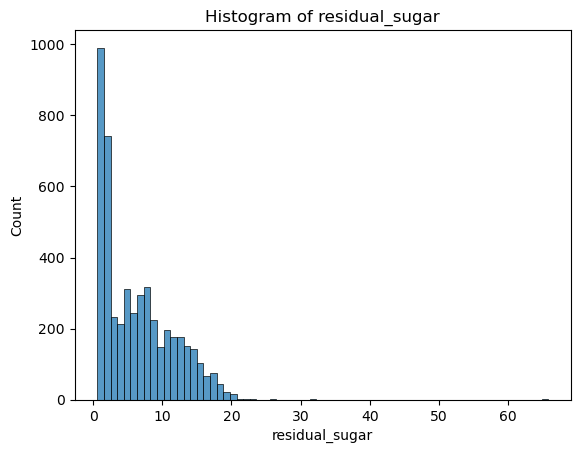

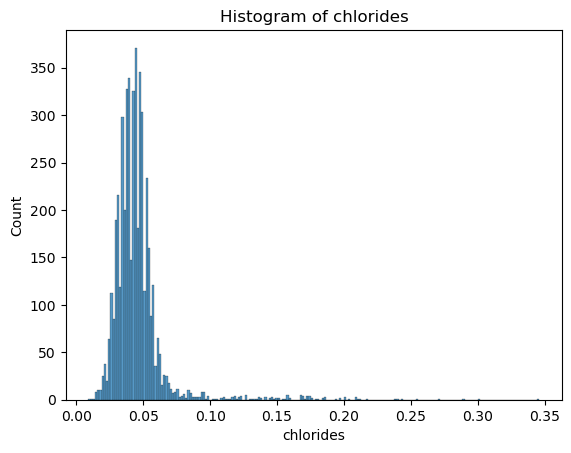

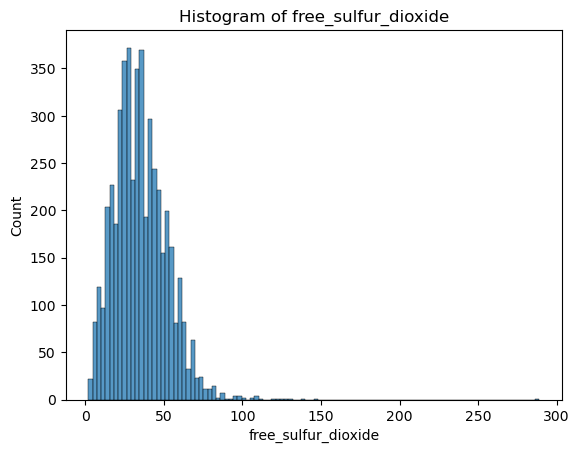

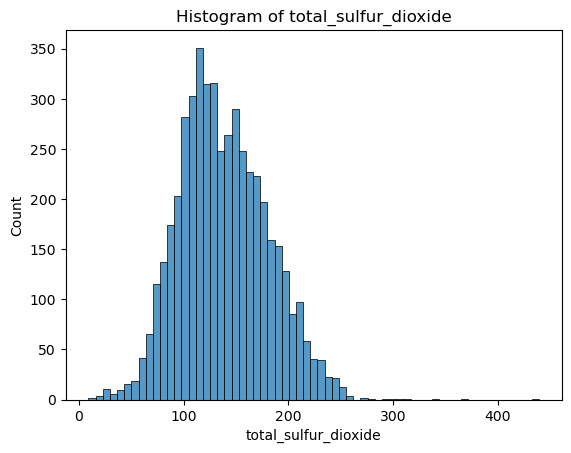

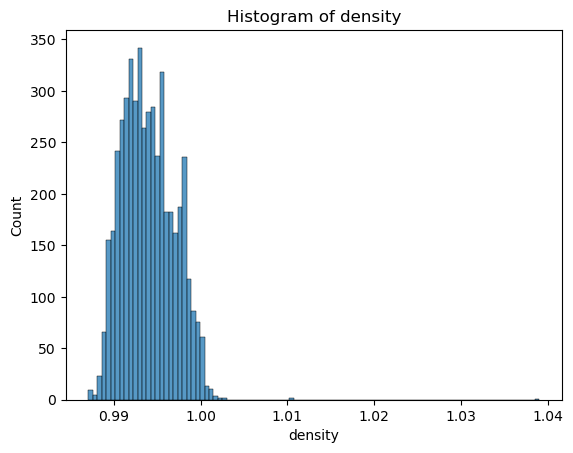

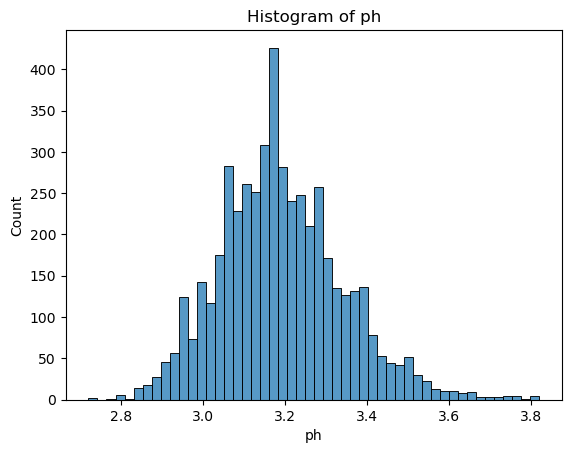

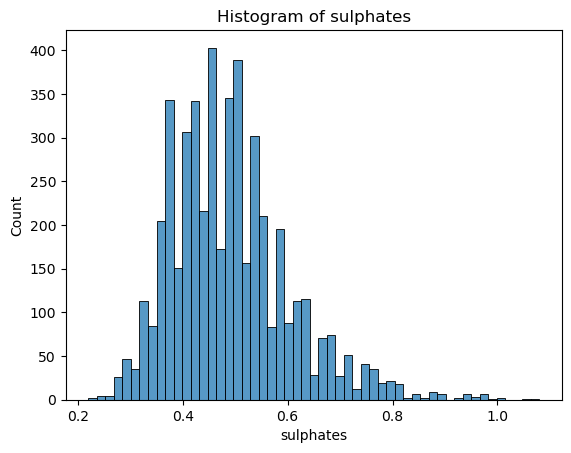

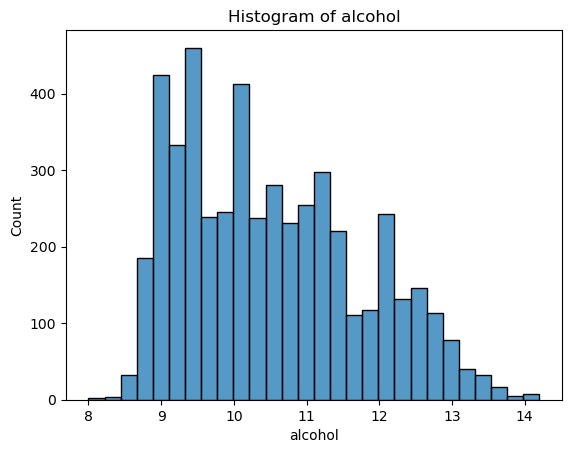

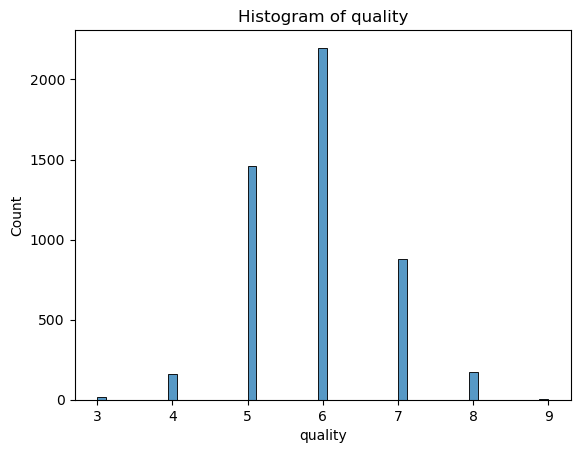

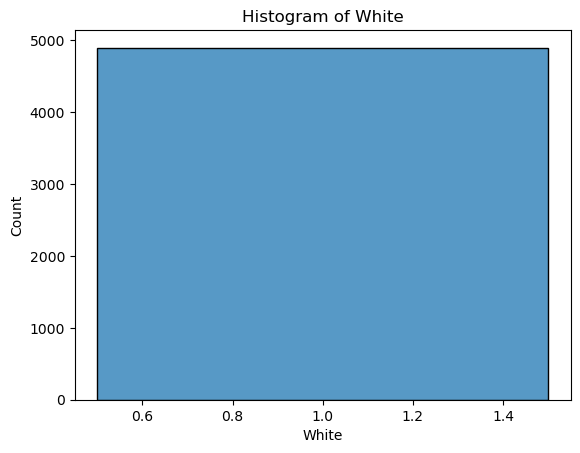

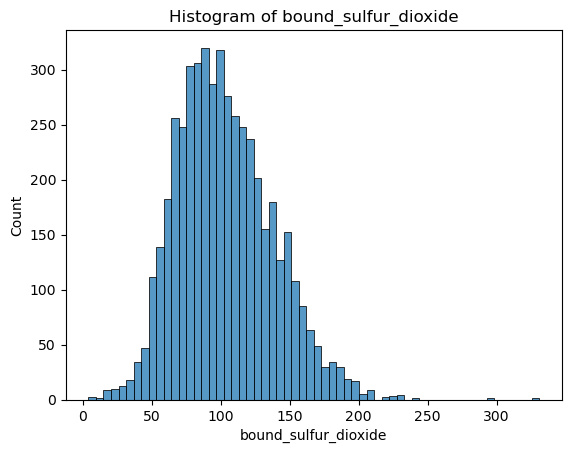

In [7]:
# use summarize function
p.summarize(df_white)

##### Takeaways:
- There are no null values in rows
- There are no null value in columns
- The data types make sense for the variables they represent

In [8]:
# check it out
df_white.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  bound_sulfur_dioxide  
0      8.8        6  White      1                 125.0  
1      9.5        6  White      1                 118.0  
2     10.1        6  White      1                  67.0  
3      9.9        6  White      1                 139.0  
4      9.9        6  White      1                 139.0

In [9]:
# explore quality prior to outlier removal, I don't want to remove any outliers from this category. Especially since it is the target
df_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

- in the line below I am using a function to remove outliers based on quartiles. I pass three features in that I want the function to ommit in the outlier removal process.

- the function will graph the variables both before and after outlier removal. The centering of data is visible through examination of the graphs.

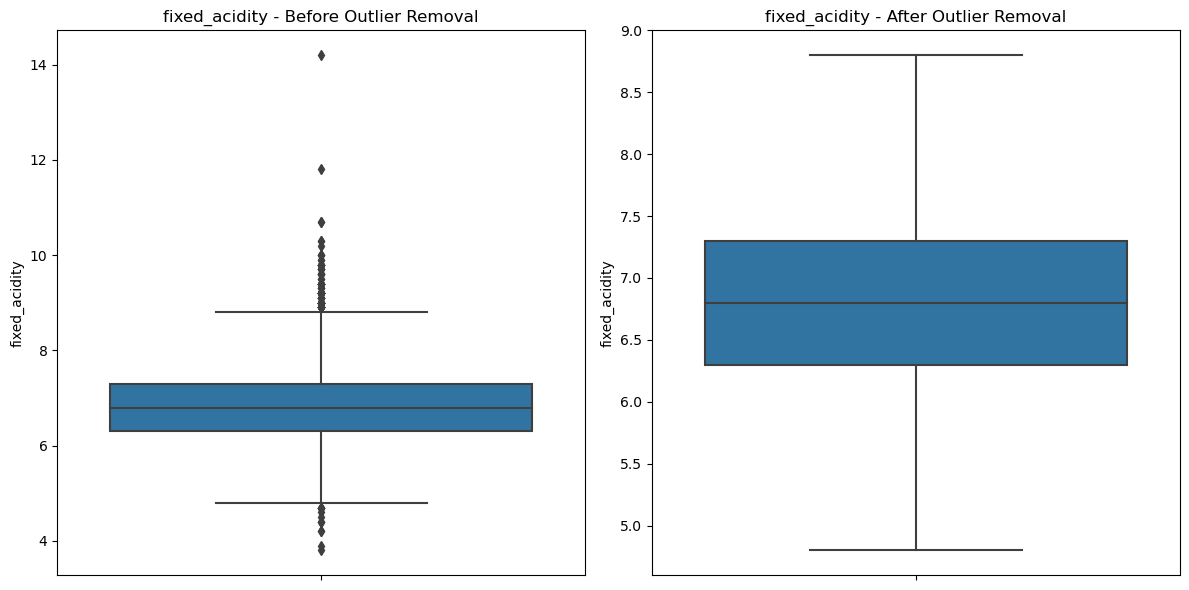

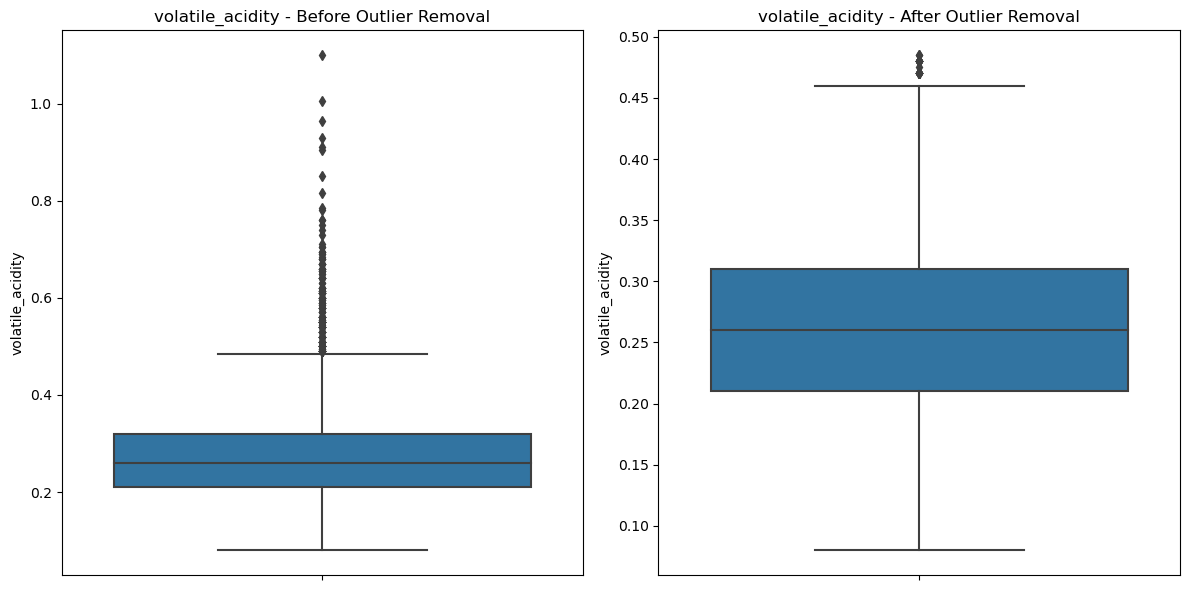

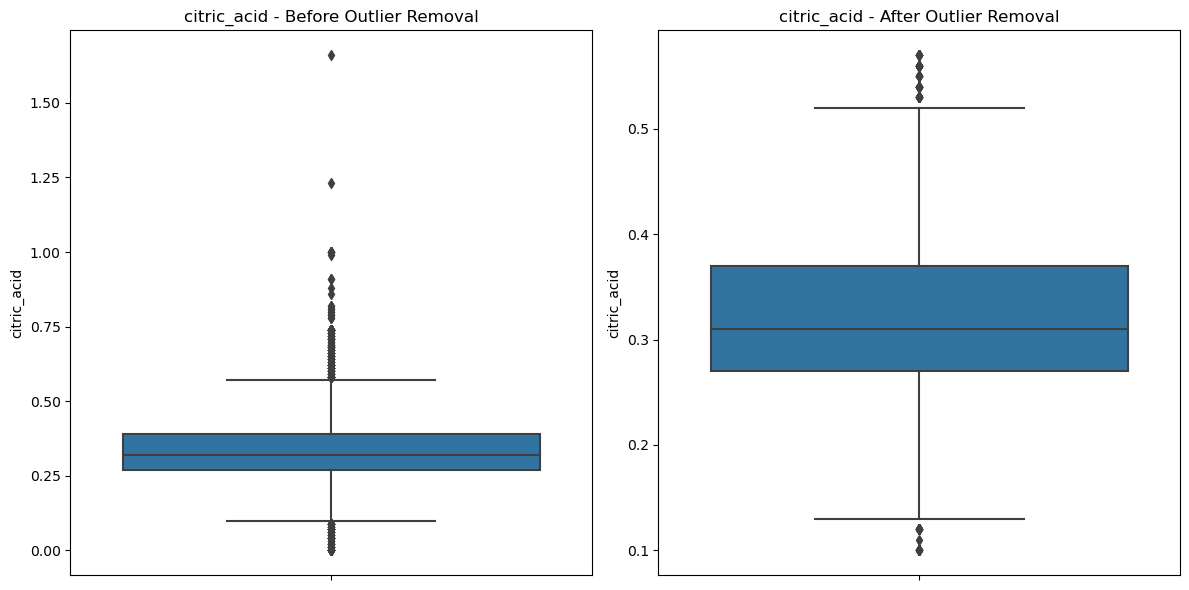

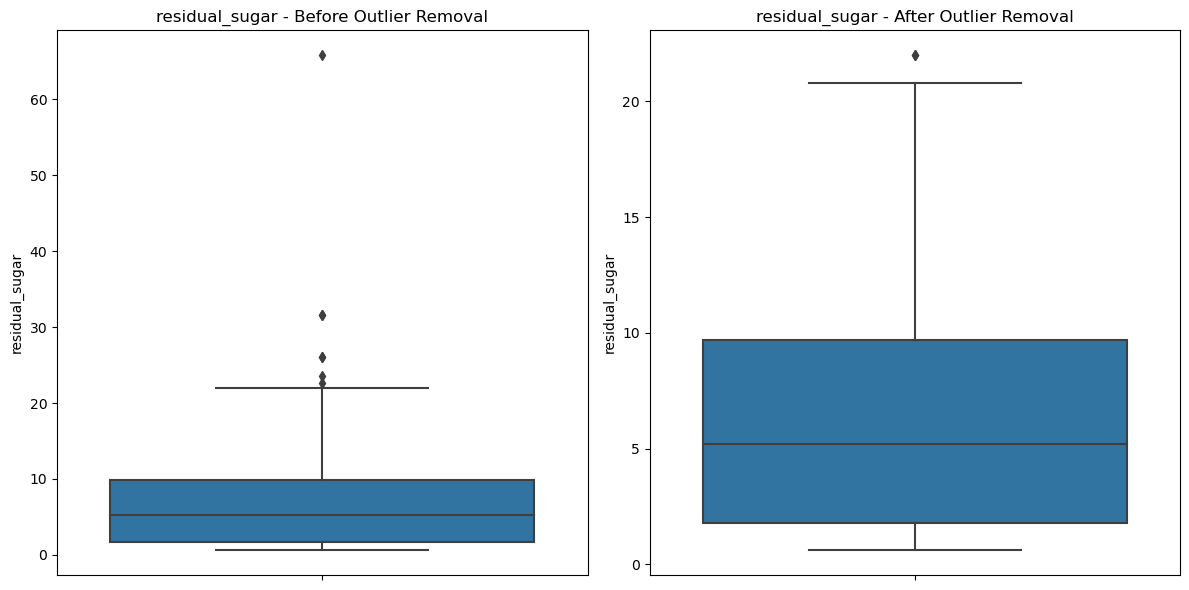

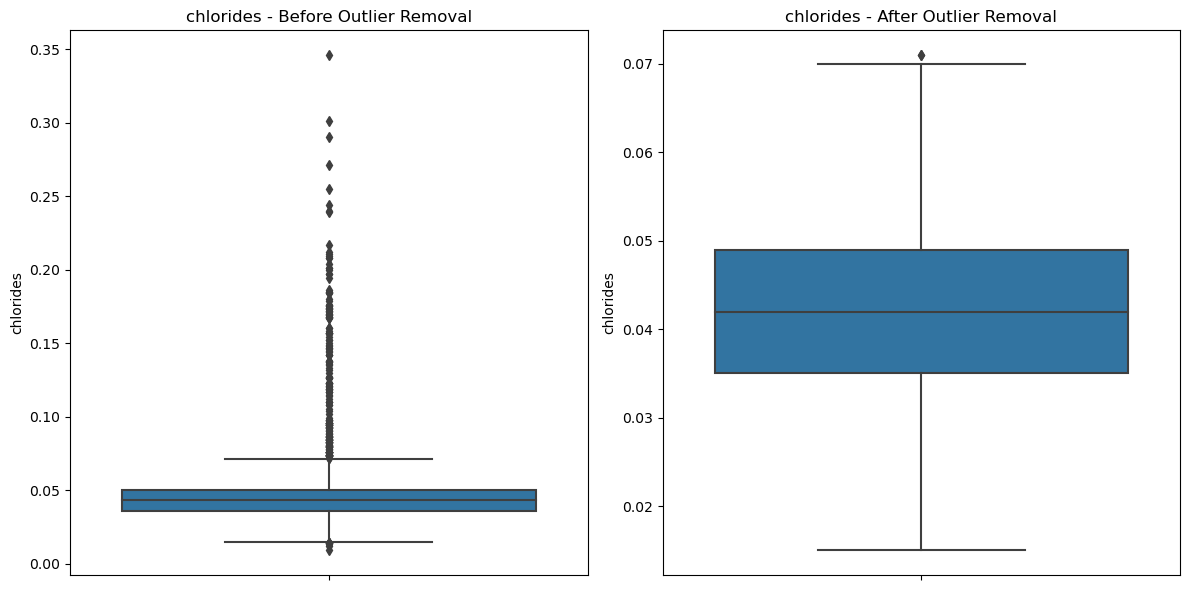

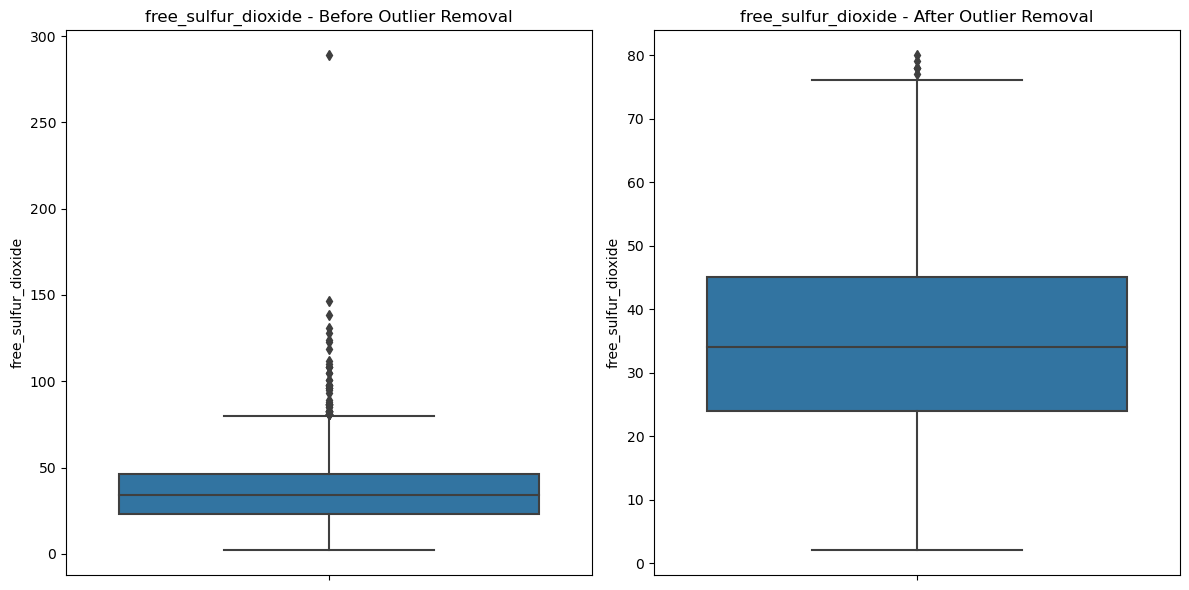

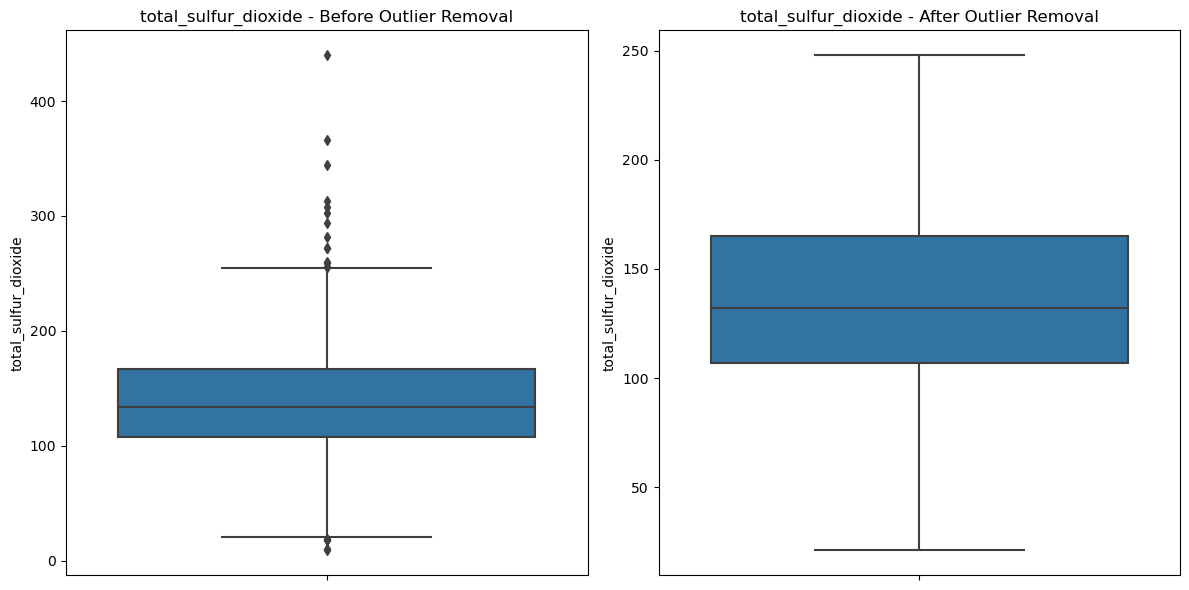

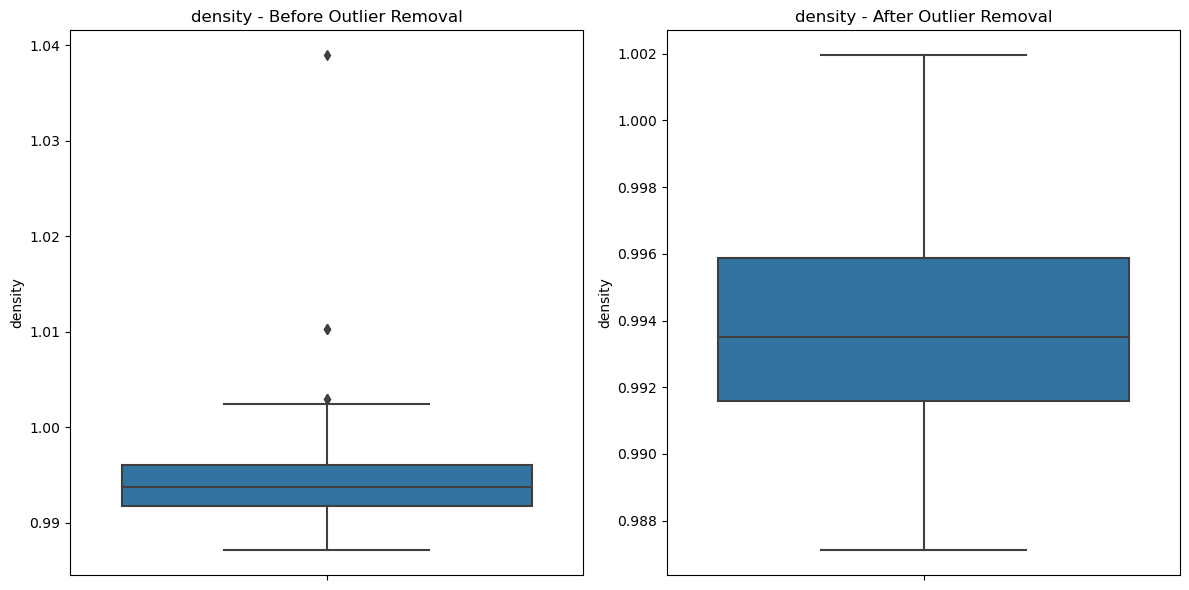

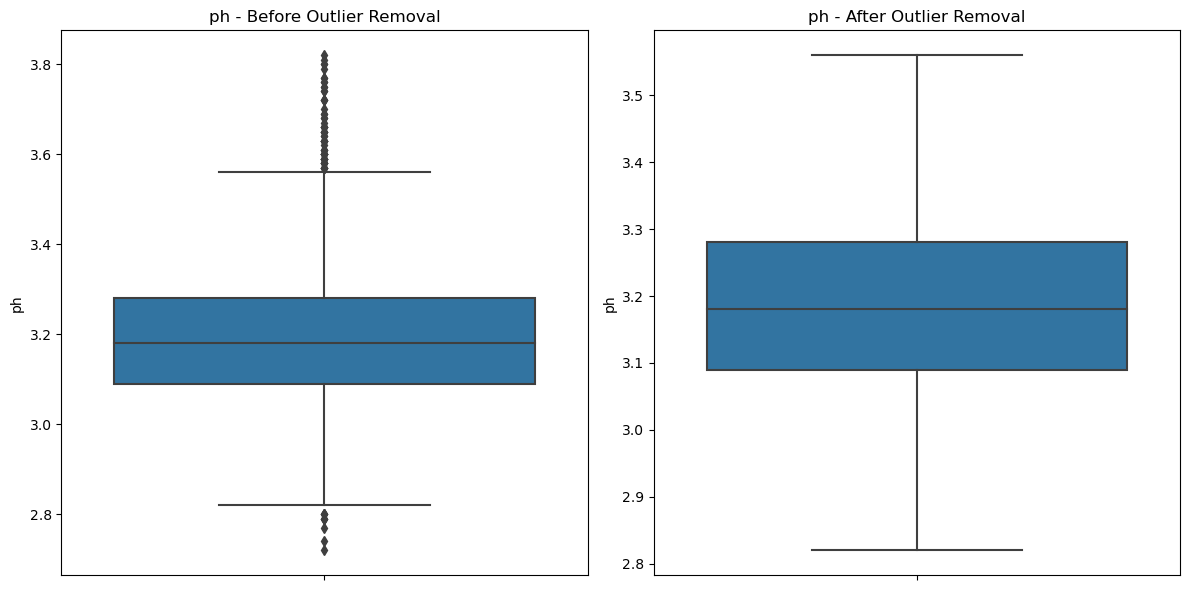

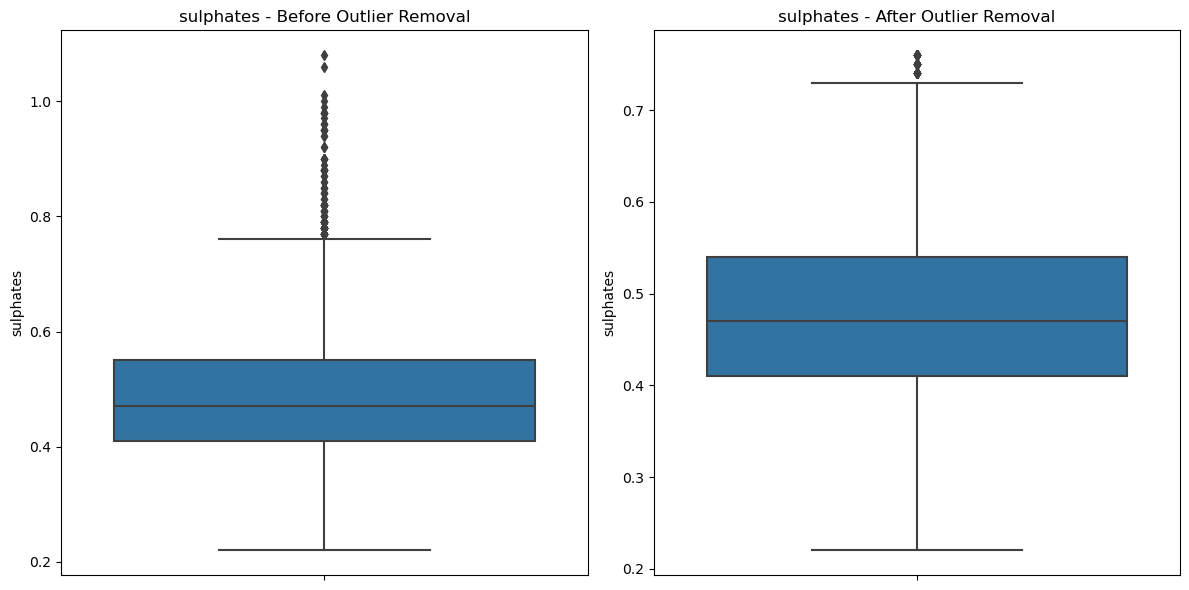

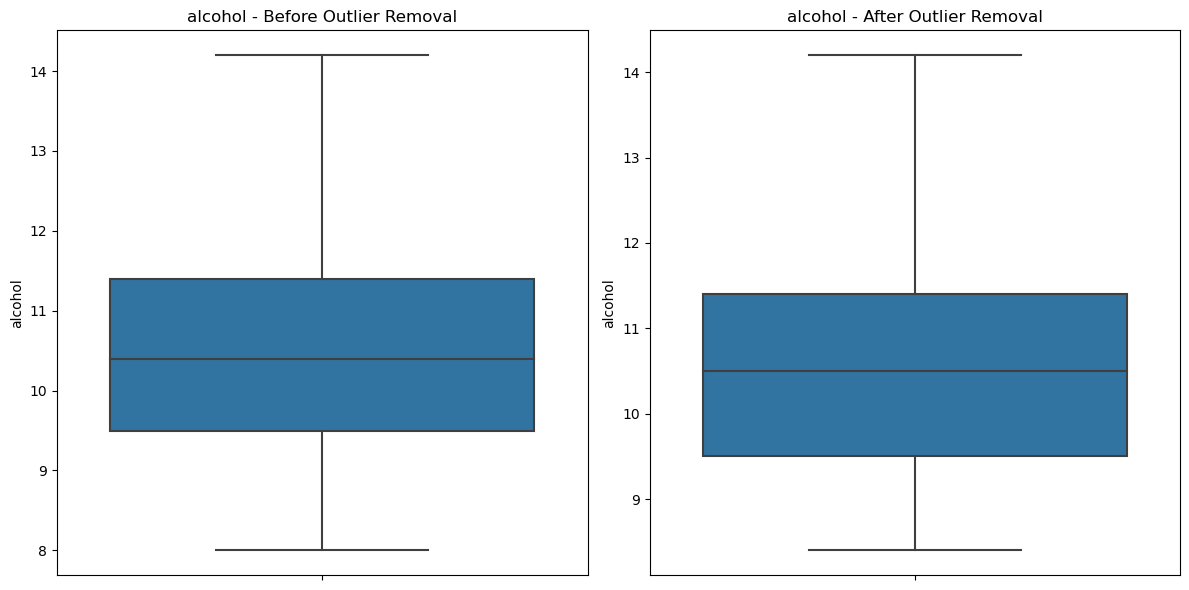

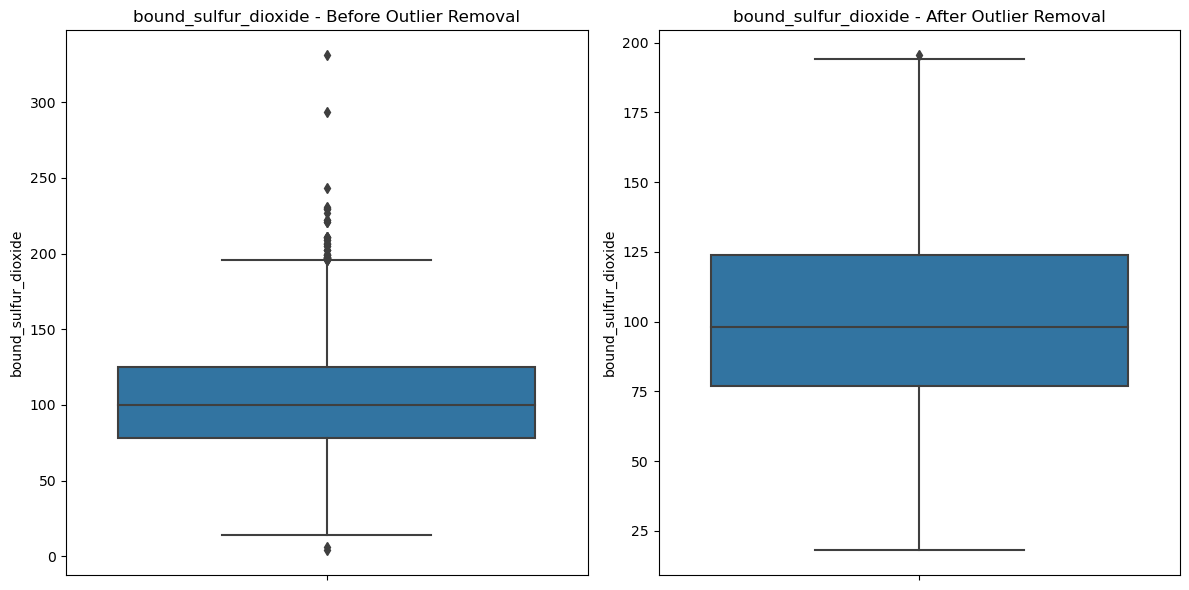

Column  Upper Bound  Lower Bound  Outliers Removed
0          fixed_acidity     8.800000     4.800000               119
1       volatile_acidity     0.485000     0.045000               186
2            citric_acid     0.570000     0.090000               270
3         residual_sugar    22.200000   -10.600000                 7
4              chlorides     0.071000     0.015000               208
5    free_sulfur_dioxide    80.500000   -11.500000                50
6   total_sulfur_dioxide   255.500000    19.500000                19
7                density     1.002666     0.985156                 5
8                     ph     3.565000     2.805000                75
9              sulphates     0.760000     0.200000               124
10               alcohol    14.250000     6.650000                 0
11  bound_sulfur_dioxide   195.500000     7.500000                43

In [10]:
# remove outliers
df_clean, summary = w.remove_outliers(df_white, exclude_columns=['Type', 'quality','White'])
summary

- I summarize again next to have a good look at the data post outlier removal

In [11]:
df_clean['Type'].value_counts()

White    3988
Name: Type, dtype: int64

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality   Type  White  bound_sulfur_dioxide  
0      8.8        6  White      1                 125.0  
1      9.5        6  White      1                 118.0  
2     10.1        6  White      1                  67.0  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988

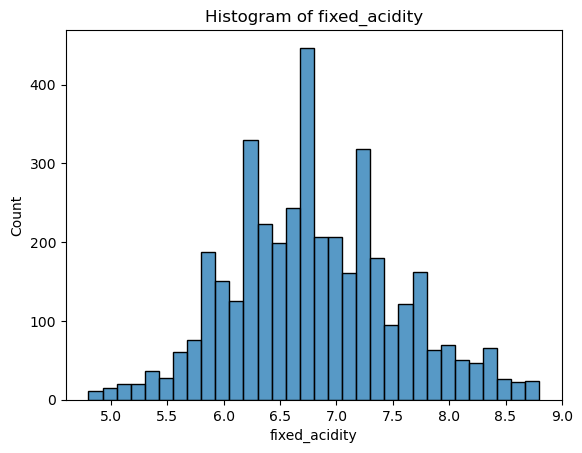

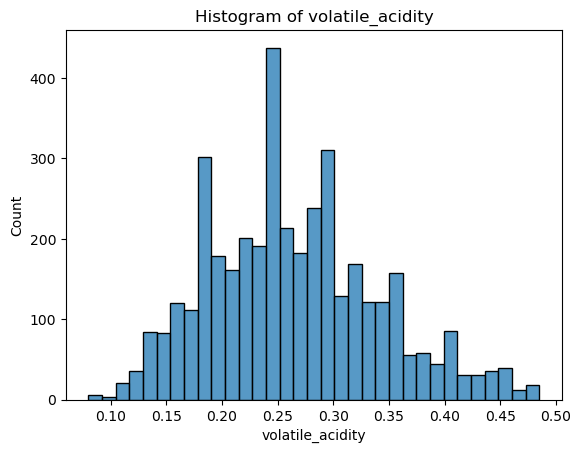

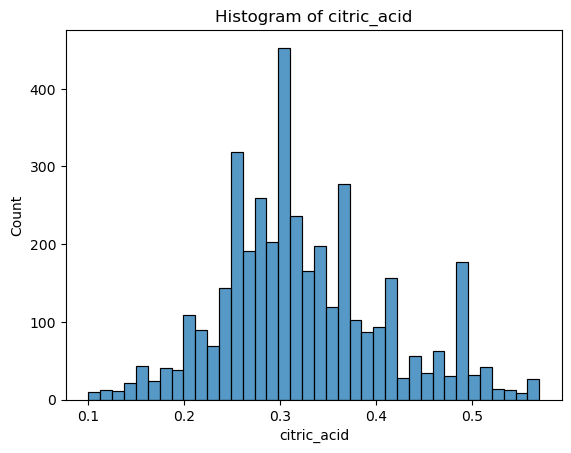

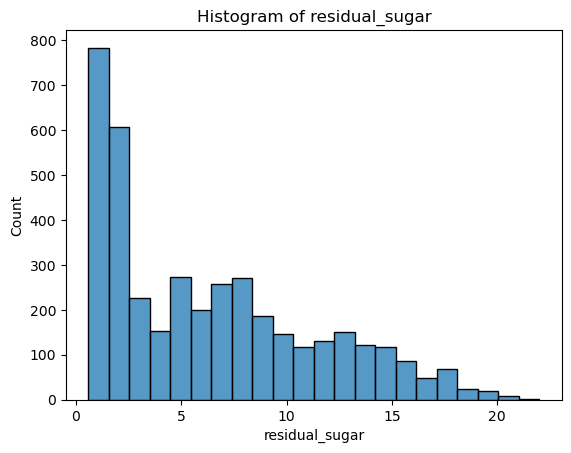

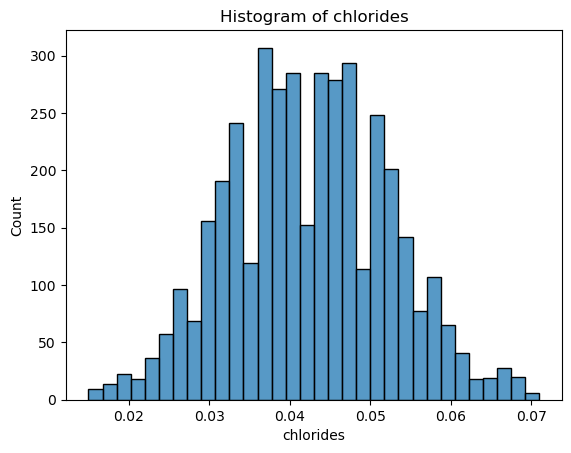

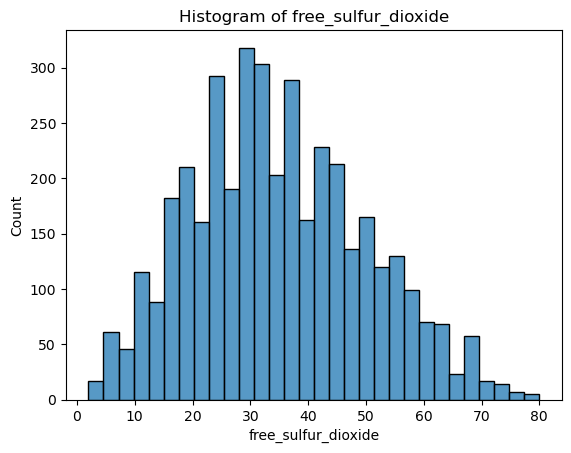

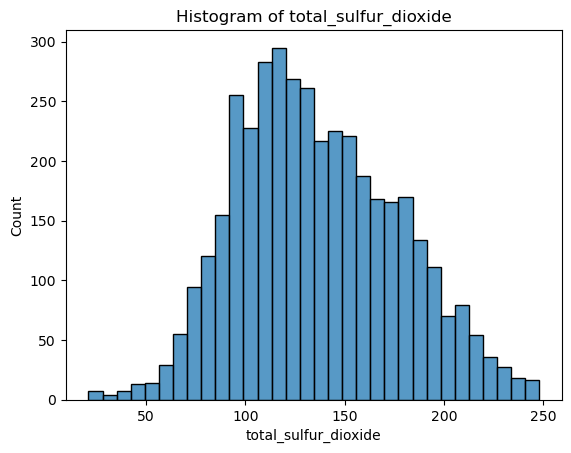

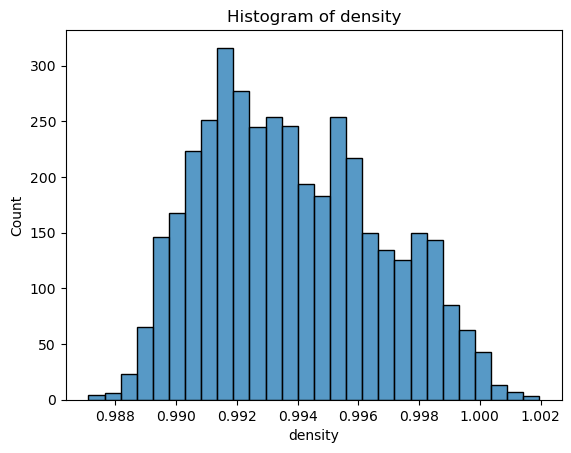

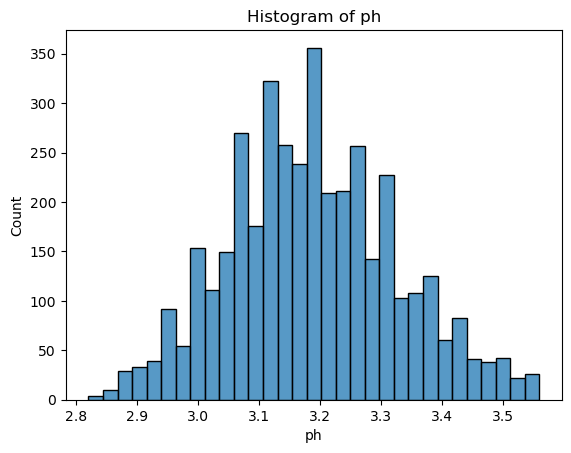

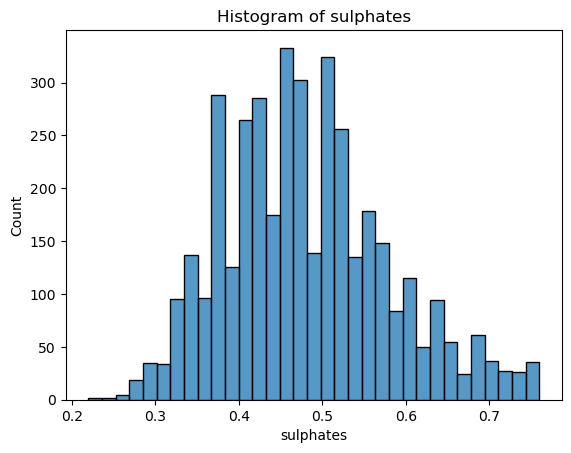

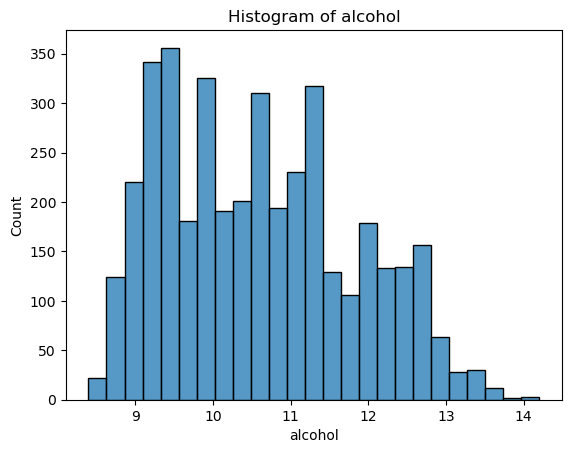

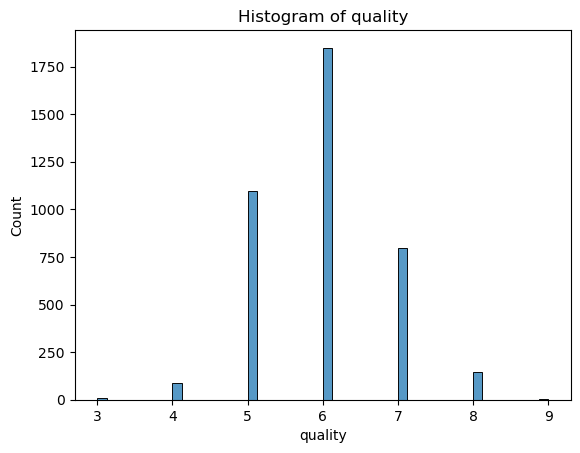

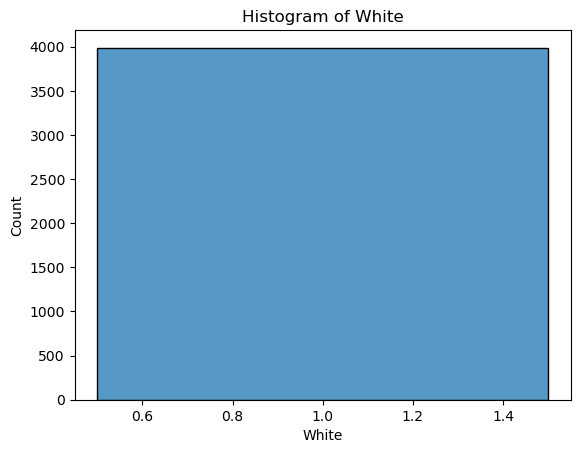

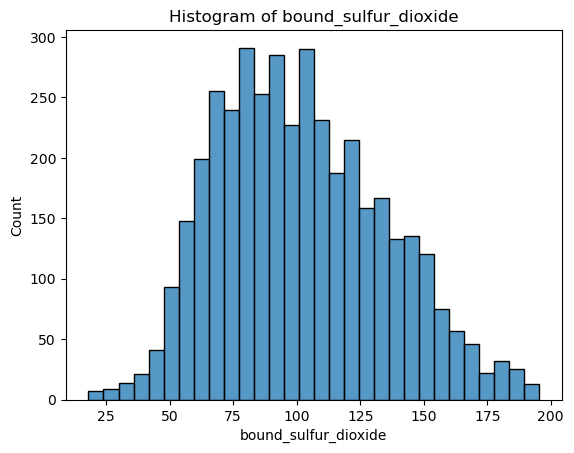

In [12]:
# summarize after outlier removal
# use summarize function
p.summarize2(df_clean)

- The graphs in the data post outlier removal are more centered and easier to visualize

In [13]:
# rename
df = df_clean
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
4893     11.2        6  White      1                  68.0  
4894      9.6        5  White      1                 111.0  
4895      9.4        6  White      1                  81.0  
4896     12.8        7  White      1                  90.0  
4897     11.8        6  White      1                  76.0  

[3988 rows x 15 columns]

# Explore

 #### Big Question: What are the drivers of wine quality?

- First step is to split into train, validate and test. I will then explore the pairwise relationships and examin the target. 



In [14]:
#split into train, validate and test
train, validate, test = p.split_data(df)
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007            6.4              0.25         0.57             1.0      0.062   
2923            6.9              0.22         0.31             6.3      0.029   
1221            5.9              0.40         0.32             6.0      0.034   
1694            7.7              0.12         0.32             1.4      0.060   
4704            6.3              0.36         0.50             8.3      0.053   
...             ...               ...          ...             ...        ...   
1748            8.0              0.27         0.24             1.2      0.044   
2717            6.8              0.16         0.29            10.4      0.046   
3403            8.8              0.27         0.25             5.0      0.024   
4190            7.0              0.22         0.30             1.4      0.040   
4445            5.0              0.35         0.25             7.8      0.031   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4007                 21.0                 122.0  0.99238  3.00       0.40   
2923                 41.0                 131.0  0.99326  3.08       0.49   
1221                 50.0                 127.0  0.99200  3.51       0.58   
1694                 47.0                 150.0  0.99520  3.37       0.42   
4704                 51.0                 202.0  0.99550  3.20       0.51   
...                   ...                   ...      ...   ...        ...   
1748                 20.0                 102.0  0.99290  3.28       0.42   
2717                 59.0                 143.0  0.99518  3.20       0.40   
3403                 52.0                  99.0  0.99250  2.87       0.49   
4190                 14.0                  63.0  0.98985  3.20       0.33   
4445                 24.0                 116.0  0.99241  3.39       0.40   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
4007      9.5        5  White      1                 101.0  
2923     10.8        6  White      1                  90.0  
1221     12.5        7  White      1                  77.0  
1694      9.2        6  White      1                 103.0  
4704      9.6        6  White      1                 151.0  
...       ...      ...    ...    ...                   ...  
1748     10.9        5  White      1                  82.0  
2717     10.8        6  White      1                  84.0  
3403     11.4        5  White      1                  47.0  
4190     12.0        6  White      1                  49.0  
4445     11.3        6  White      1                  92.0  

[2392 rows x 15 columns]

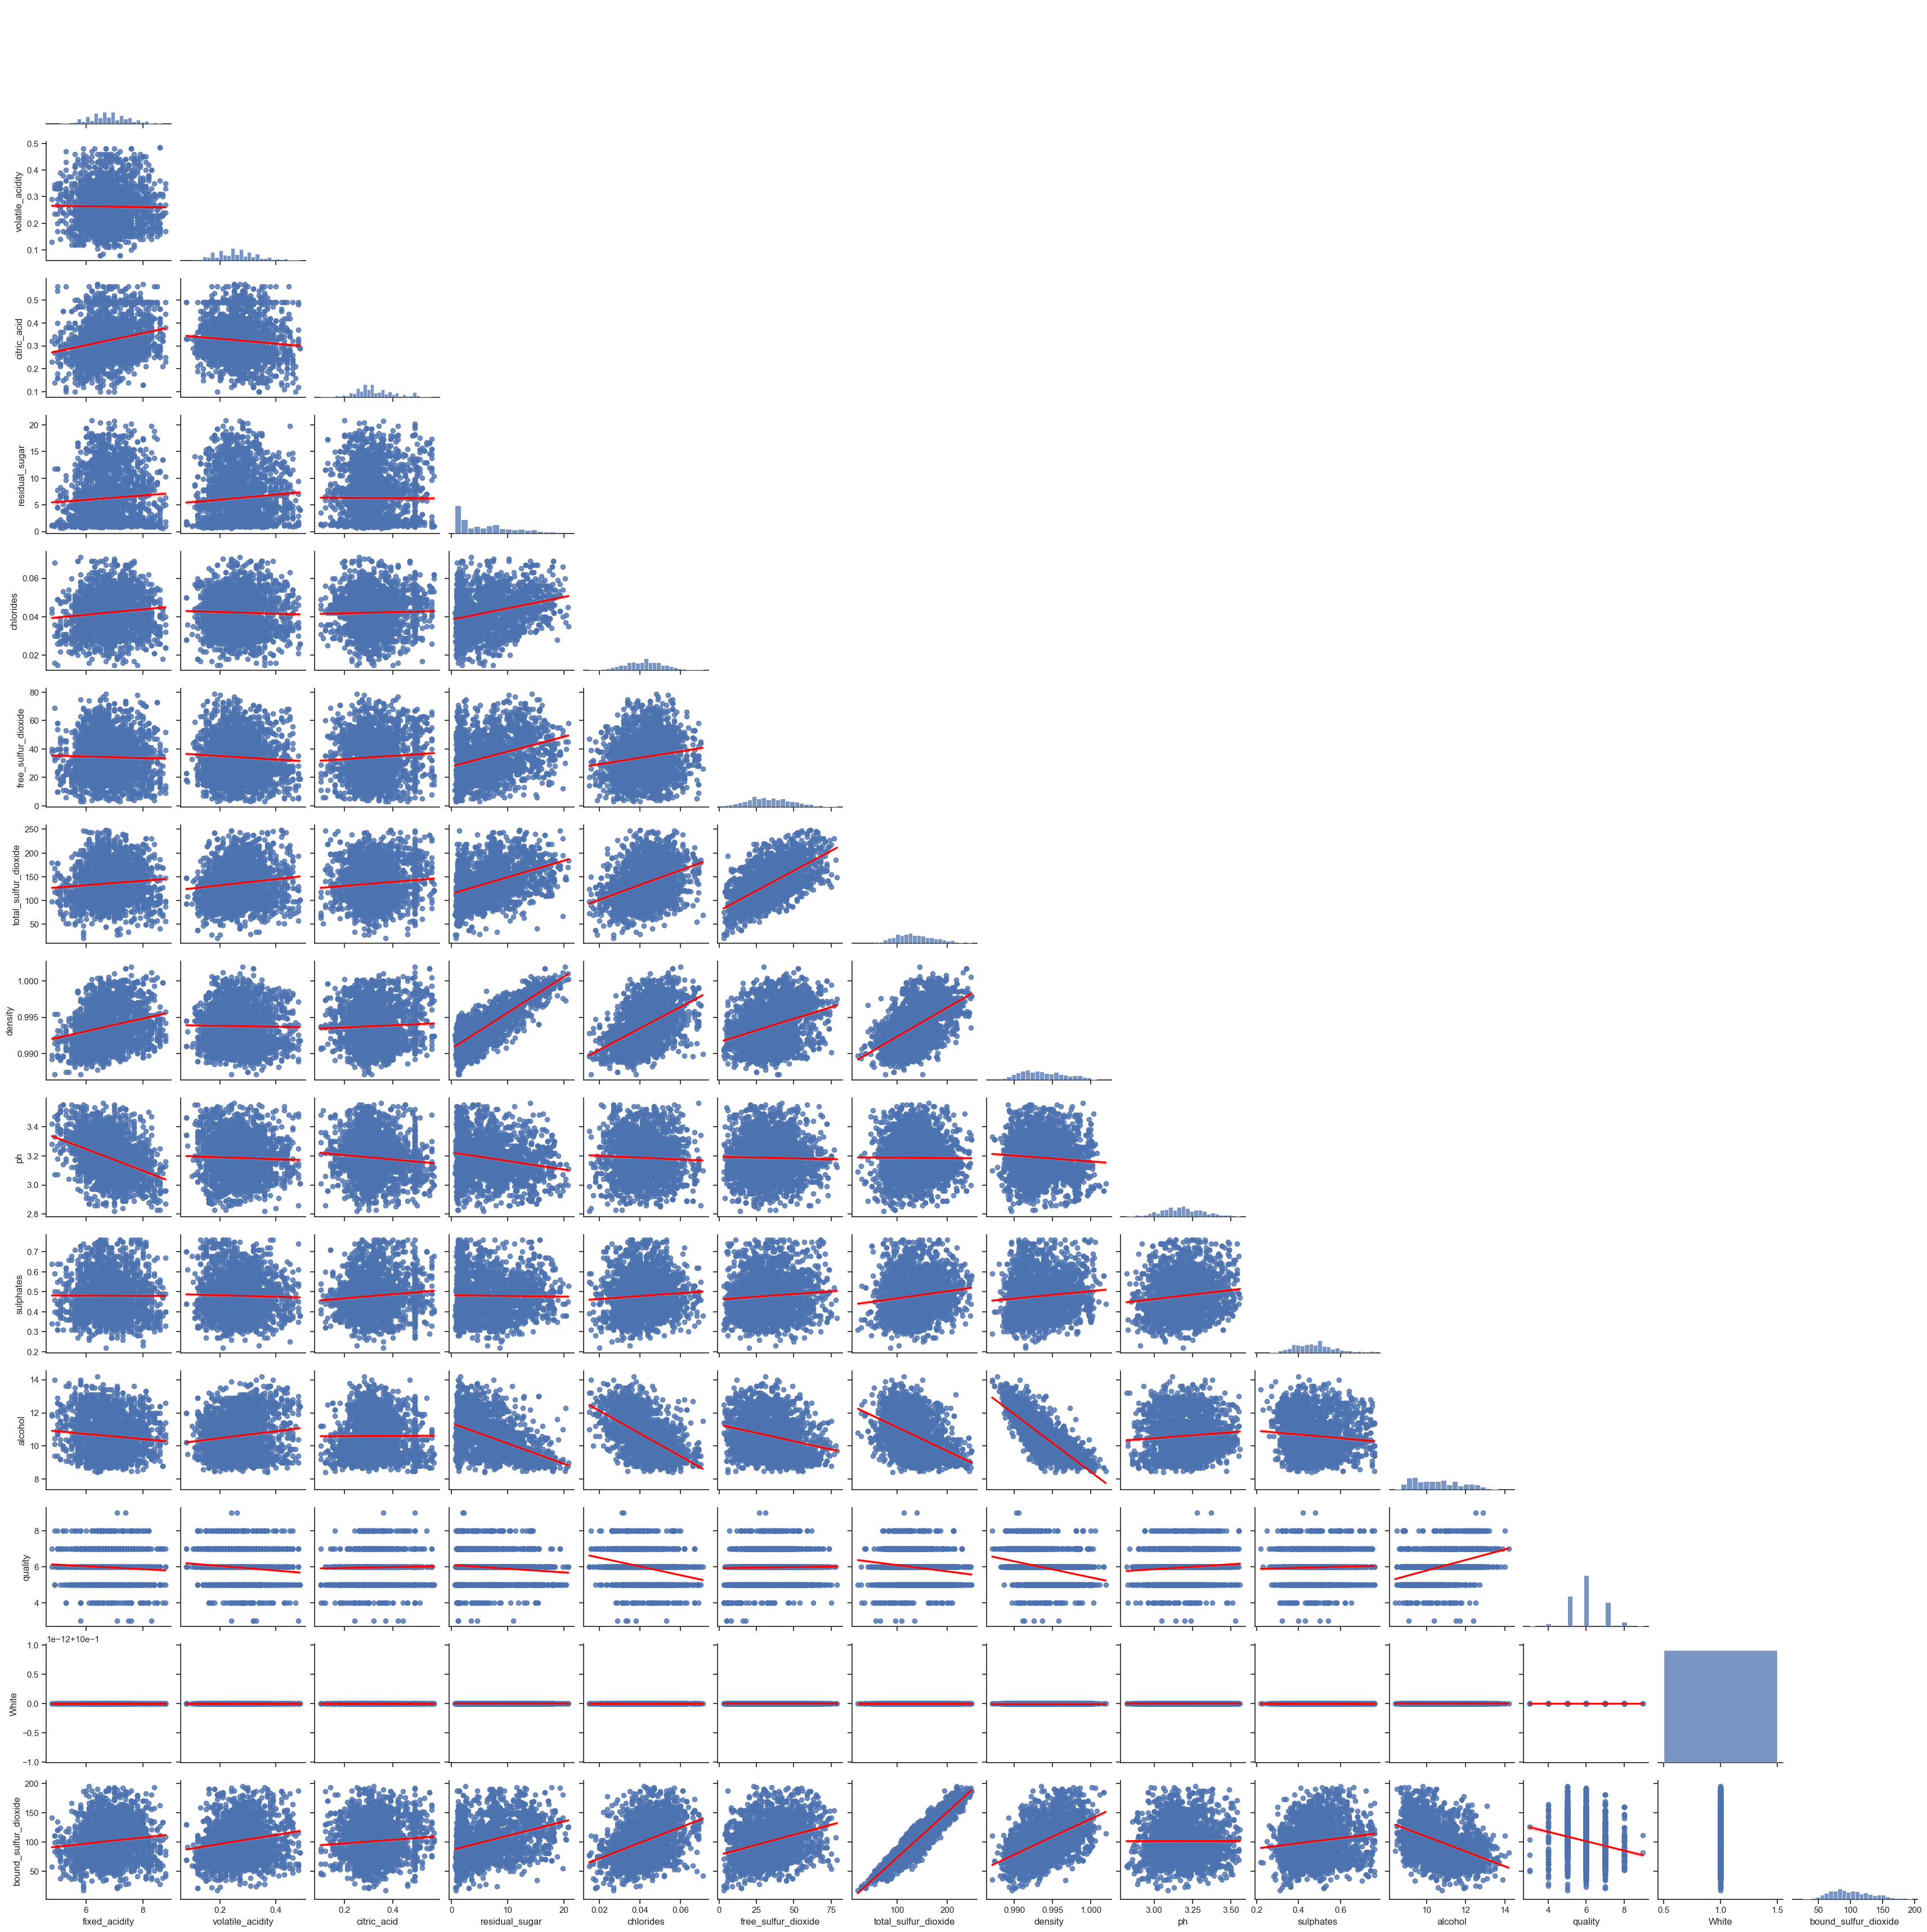

In [15]:
# View pairwise relationships
exp.plot_variable_pairs(train)

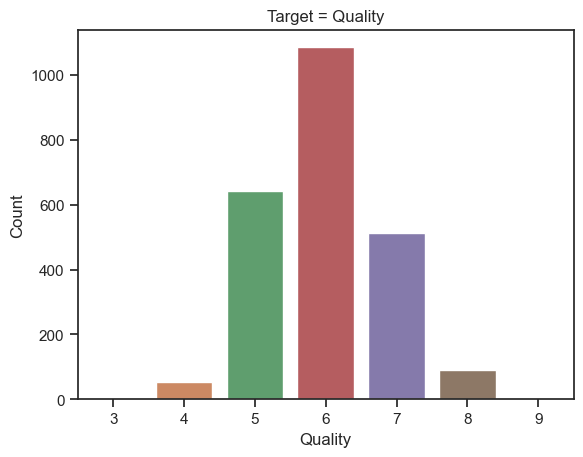

In [16]:
# View Target
sns.countplot(x=train.quality)
plt.title('Target = Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [17]:
# check for normal distribution
tstat,pvalue = stats.shapiro(train.quality)
pvalue

5.7822114845066365e-39

- Shapiro test confirms a normal distribution of the target
- The graph visually makes sense, the lowest and highest quality ratings have the least amount of wines. There are the exceptional few on both ends of the specturm.



# Set parameters for stats test
- For all stats test alpha is 0.05, giving a 95% confidence level that our assumptions are not guesses.
- The Shapiro test for normalcy will be used to confirm normalcy of the data, although there are enough data points to use the Central Limit Theorm.
- A function is used to graph the continuous variable vs. categorical variable through each of the variables. 

In [18]:
# set alpha
alpha = 0.05

- for ttest stats testing, the overall mean of the target will be used throughout

In [19]:
# set overall mean for ttest that follow
overall_mean = train.quality.mean()
overall_mean

5.974498327759197

# Is there a relationship betweeen Quality (Categorical) vs. Fixed acidity(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and fixed acidity 

$H_{a}$ : there is a relationship between wine quality and fixed acidity

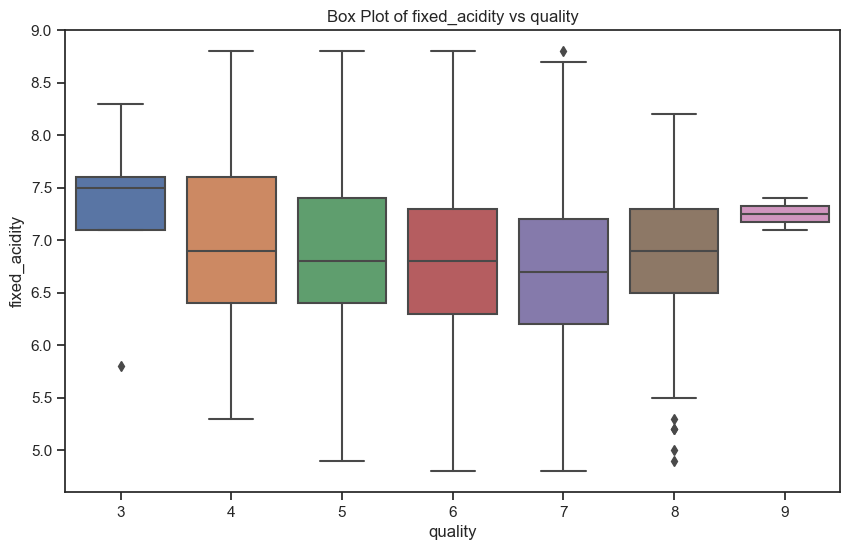

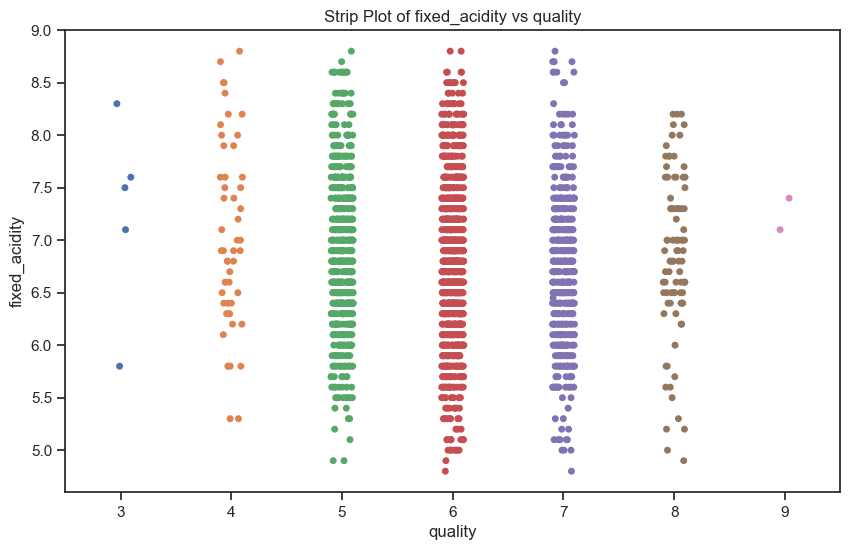

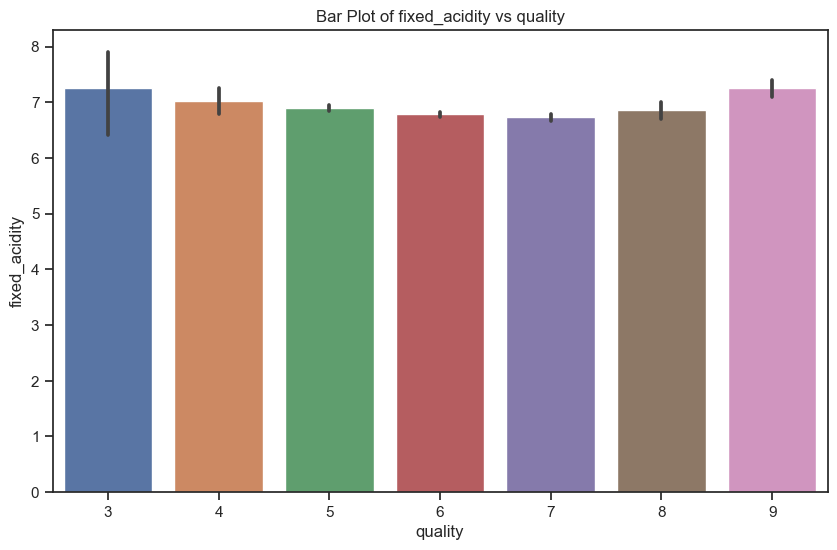

In [20]:
# quality vs. fixed_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality','fixed_acidity')

In [21]:
# check for normal distribution
stats.shapiro(train.fixed_acidity)

ShapiroResult(statistic=0.9945216178894043, pvalue=9.569355086114228e-08)

In [22]:
# stats test
tstat, pval = stats.ttest_1samp(train.fixed_acidity, overall_mean)
tstat, pval

(55.268846444030615, 0.0)

In [23]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The fixed_acidity variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The strip plot shows an interesting concentration of data around the middle of the quality spectrum.

# Is there a relationship between Quality (Categorical) vs. Volatile Acidity(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and volatile acidity 

$H_{a}$ : there is a relationship between wine quality and volatile acidity

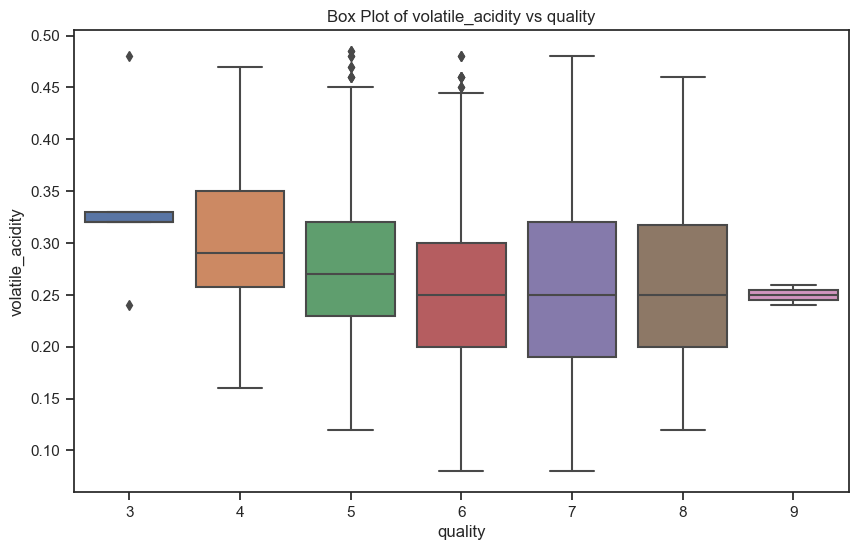

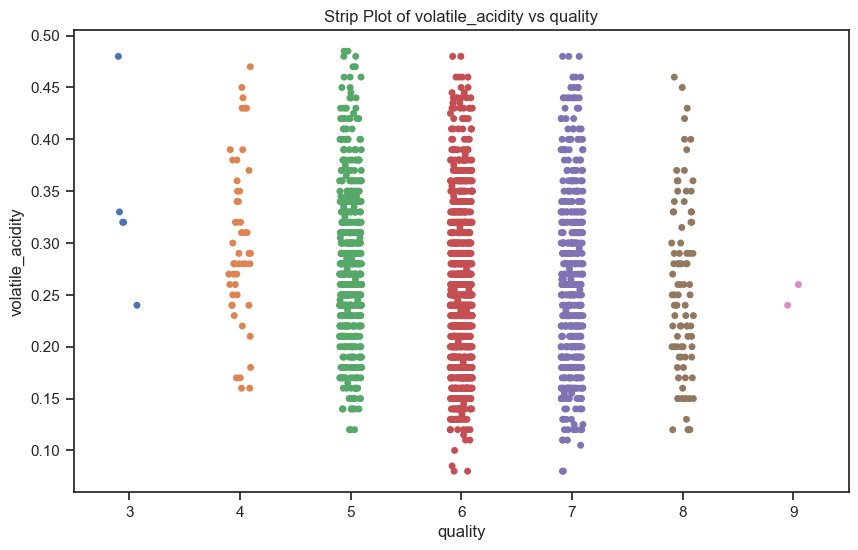

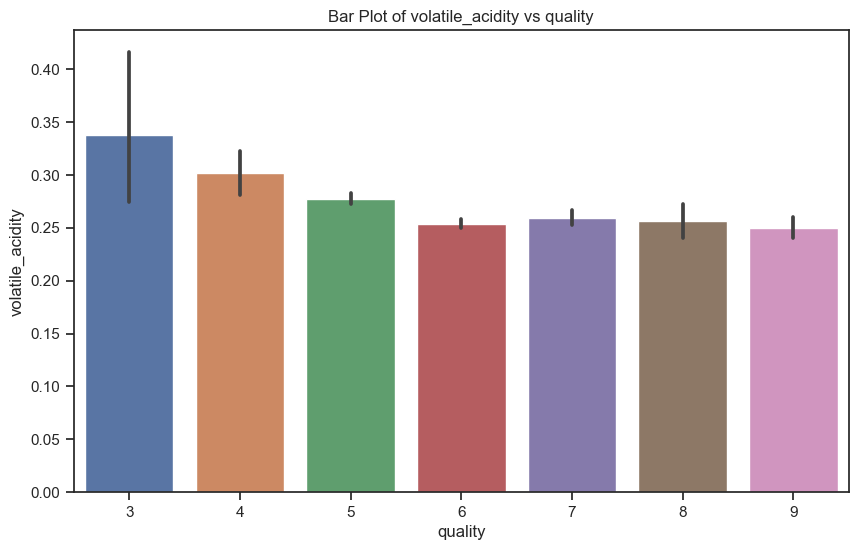

In [24]:
# quality vs. volatile_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality', 'volatile_acidity')

In [25]:
# check for normal distribution
stats.shapiro(train.volatile_acidity)

ShapiroResult(statistic=0.9835982918739319, pvalue=5.50610908626461e-16)

In [26]:
# stats test
tstat, pval = stats.ttest_1samp(train.volatile_acidity, overall_mean)
tstat, pval

(-3699.7698569367085, 0.0)

In [27]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The volatile_acidity variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The strip plot shows an interesting concentration of data around the middle of the quality spectrum.

# Is there a relationship between Quality (Categorical) vs. Citric Acid (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and citric acid 

$H_{a}$ : there is a relationship between wine quality and citric acid

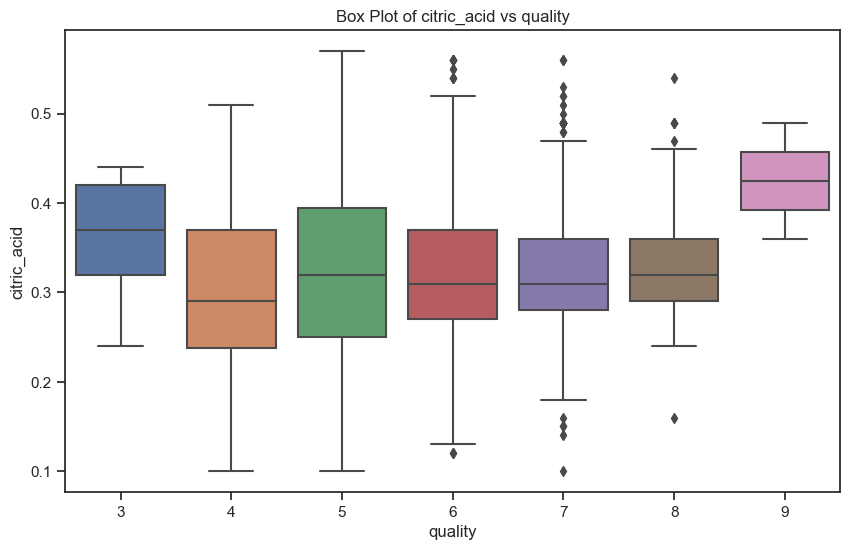

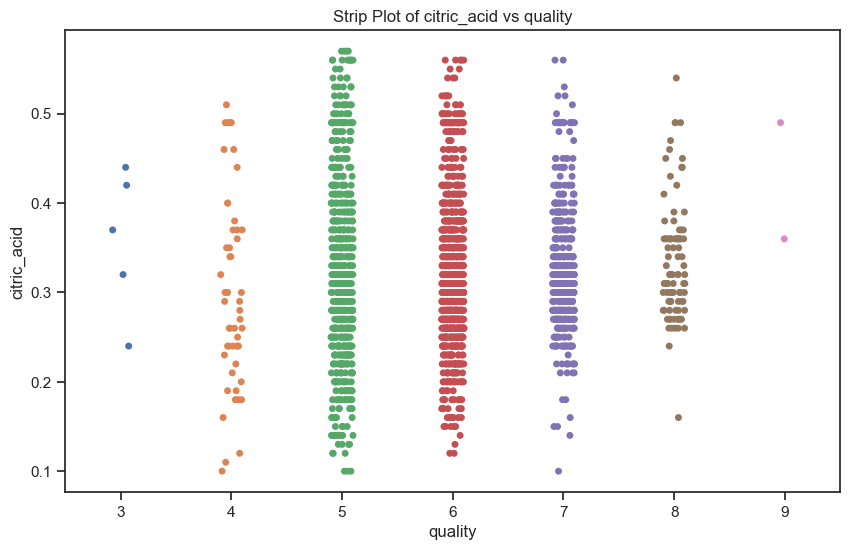

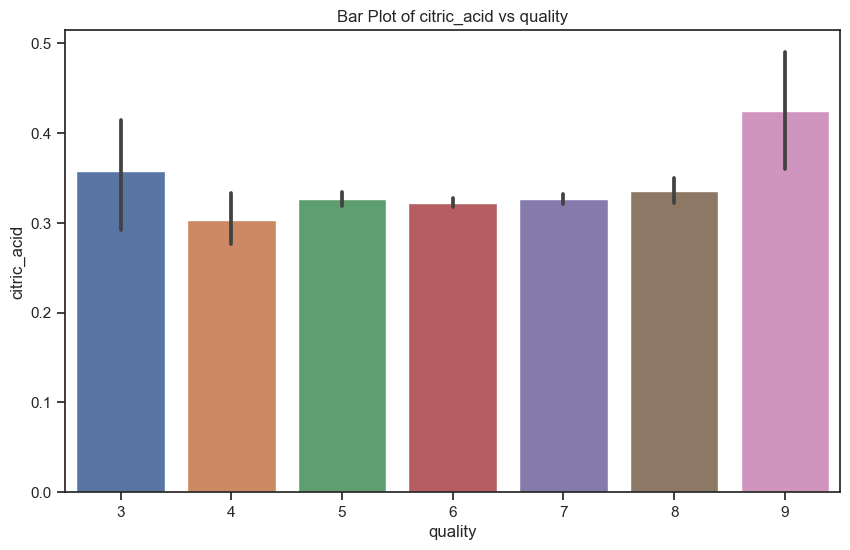

In [28]:
# quality vs. citric_acid
exp.plot_categorical_and_continuous_vars(train, 'quality', 'citric_acid')

In [29]:
# check for normal distribution
stats.shapiro(train.citric_acid)

ShapiroResult(statistic=0.9731398820877075, pvalue=8.644613357992372e-21)

In [30]:
# stats test
tstat, pval = stats.ttest_1samp(train.citric_acid, overall_mean)
tstat, pval

(-3222.452757616182, 0.0)

In [31]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The citric_acid variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The box plot shows small variations of data and seem to bookend quality.

# Is there a relationship between Quality (Categorical) vs. Residual sugar (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and residual sugar

$H_{a}$ : there is a relationship between wine quality and residual sugar

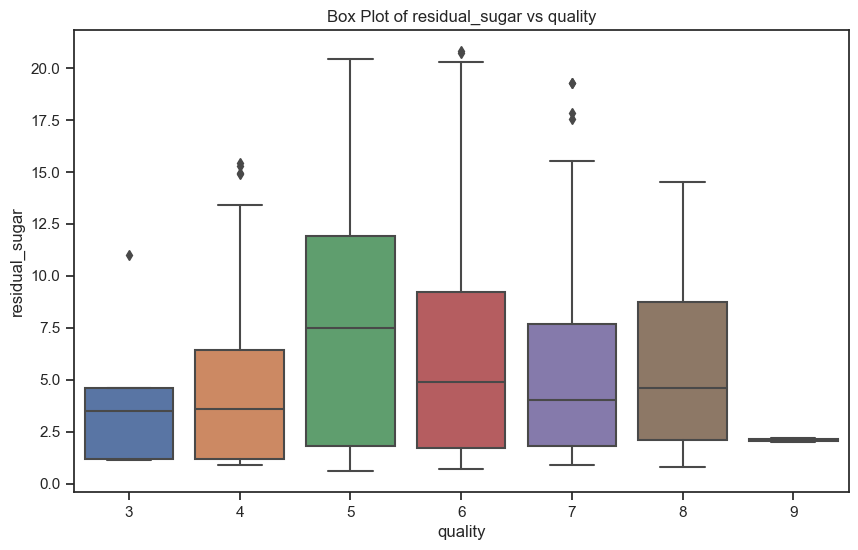

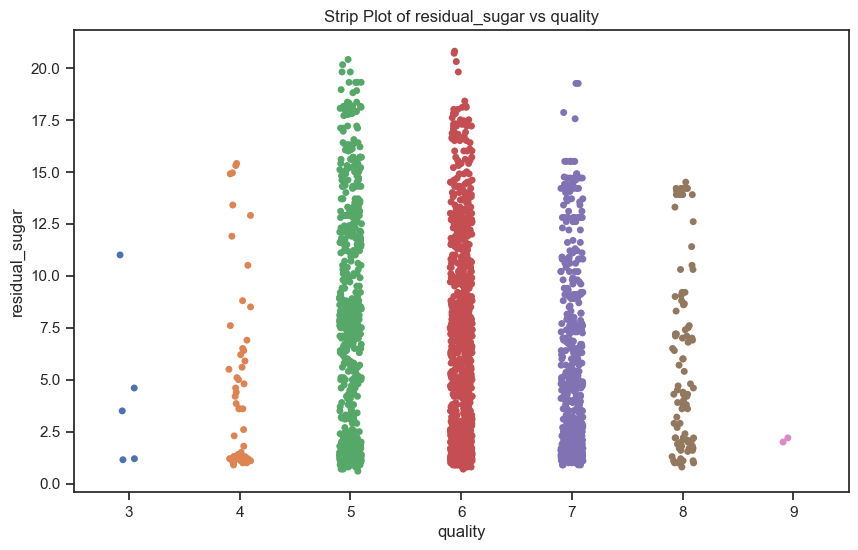

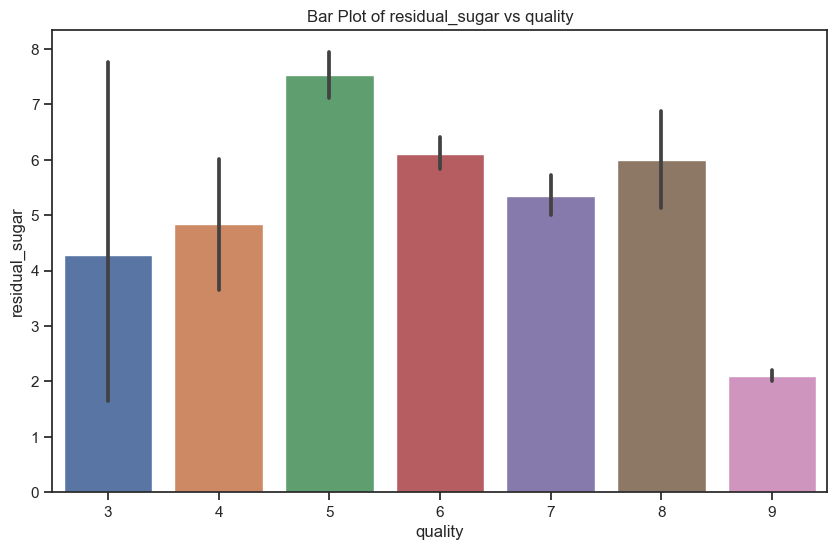

In [32]:
# quality vs. residual_sugar
exp.plot_categorical_and_continuous_vars(train, 'quality', 'residual_sugar')

In [33]:
# check for normal distribution
stats.shapiro(train.residual_sugar)

ShapiroResult(statistic=0.8935681581497192, pvalue=7.889063165099613e-38)

In [34]:
# stats test
tstat, pval = stats.ttest_1samp(train.residual_sugar, overall_mean)
tstat, pval

(3.107782549031559, 0.0019071276042822714)

In [35]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The residual sugar variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The plots show large amounts of residual sugar in the 5, 6 quality category. Residual sugar also seems to be higher in the lower to mid quality range. 

# Is there a relationship between Quality (Categorical) vs. Chlorides (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and chlorides

$H_{a}$ : there is a relationship between wine quality and chlorides

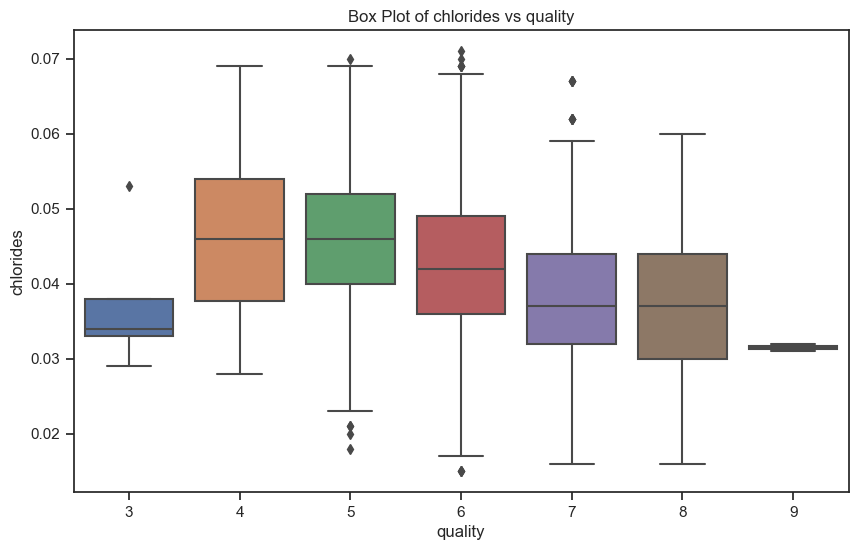

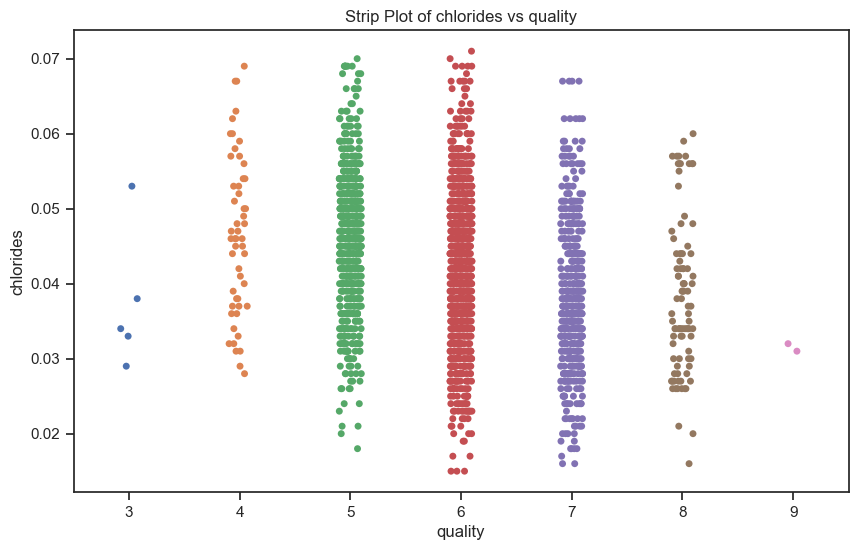

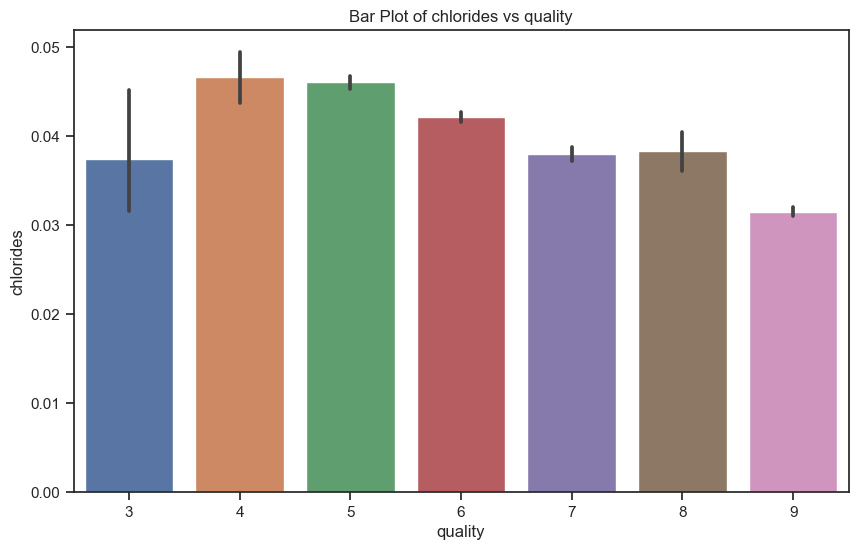

In [36]:
# quality vs. chlorides
exp.plot_categorical_and_continuous_vars(train, 'quality', 'chlorides')

In [37]:
# check for normal distribution
stats.shapiro(train.chlorides)

ShapiroResult(statistic=0.9962806105613708, pvalue=1.2429033631633501e-05)

In [38]:
# stats test
tstat, pval = stats.ttest_1samp(train.chlorides, overall_mean)
tstat, pval

(-28993.644839548364, 0.0)

In [39]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The chlorides variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of chlorides to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Free Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and Free Sulfur Dioxide

$H_{a}$ : there is a relationship between wine quality and Free Sulfur Dioxide

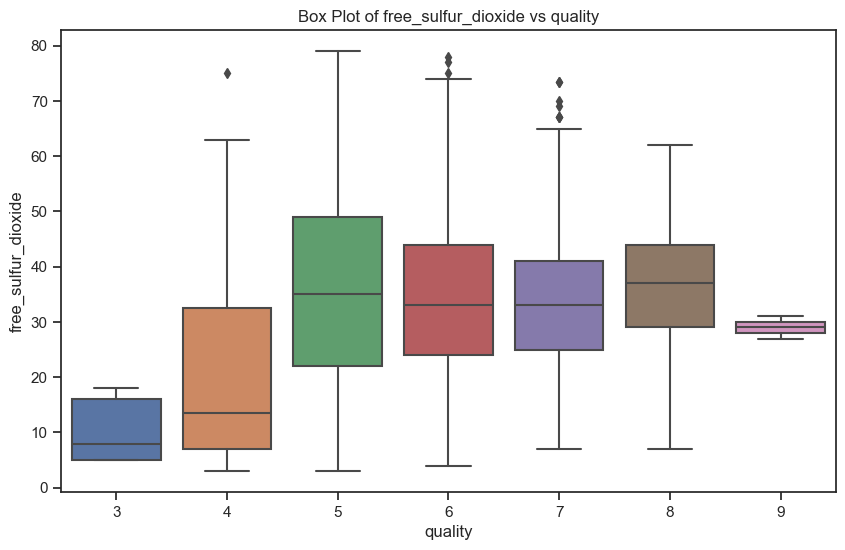

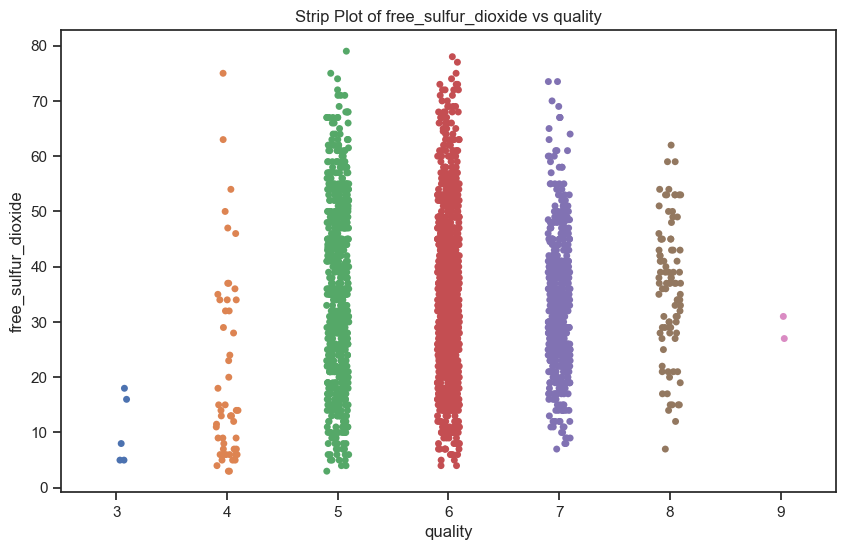

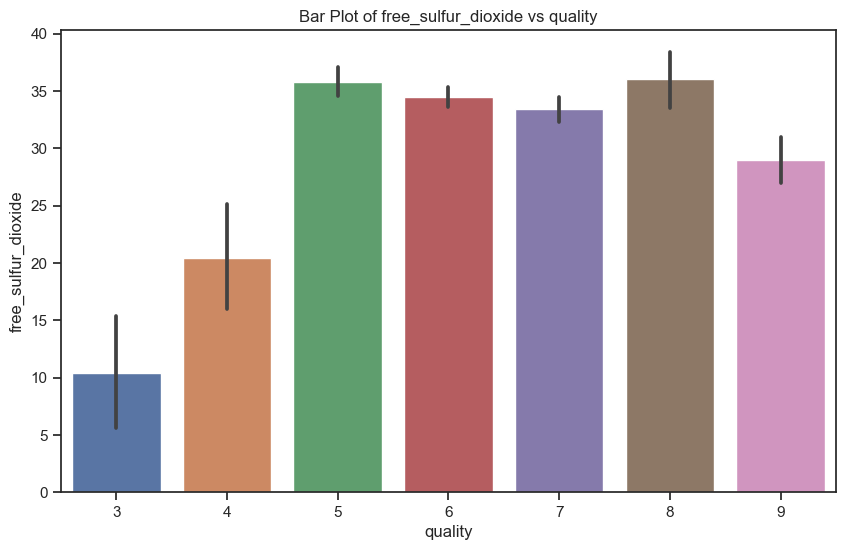

In [40]:
# quality vs. free_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'free_sulfur_dioxide')

In [41]:
# check for normal distribution
stats.shapiro(train.free_sulfur_dioxide)

ShapiroResult(statistic=0.988032877445221, pvalue=2.839534434407459e-13)

In [42]:
# stats test
tstat, pval = stats.ttest_1samp(train.free_sulfur_dioxide, overall_mean)
tstat, pval

(93.4830610119723, 0.0)

In [43]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight increasing trend of free_sulfur_dioxide to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Total Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and total sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and total sulfur dioxide

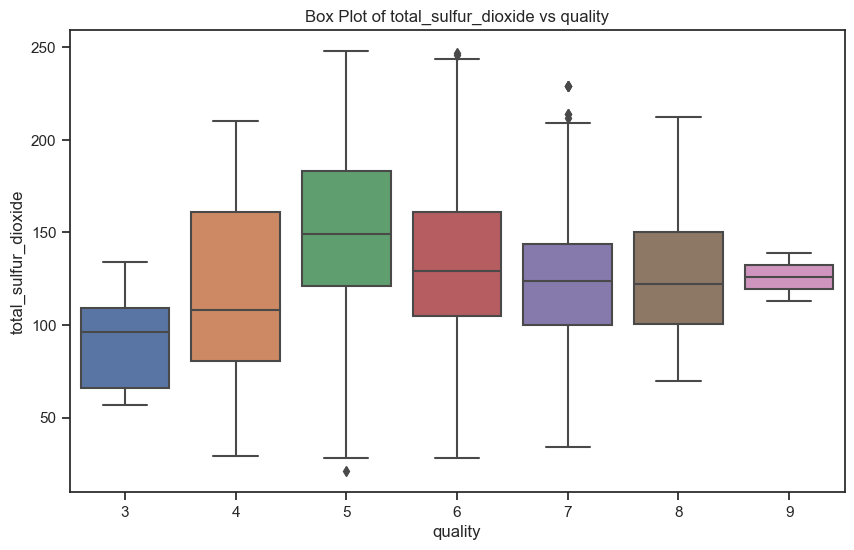

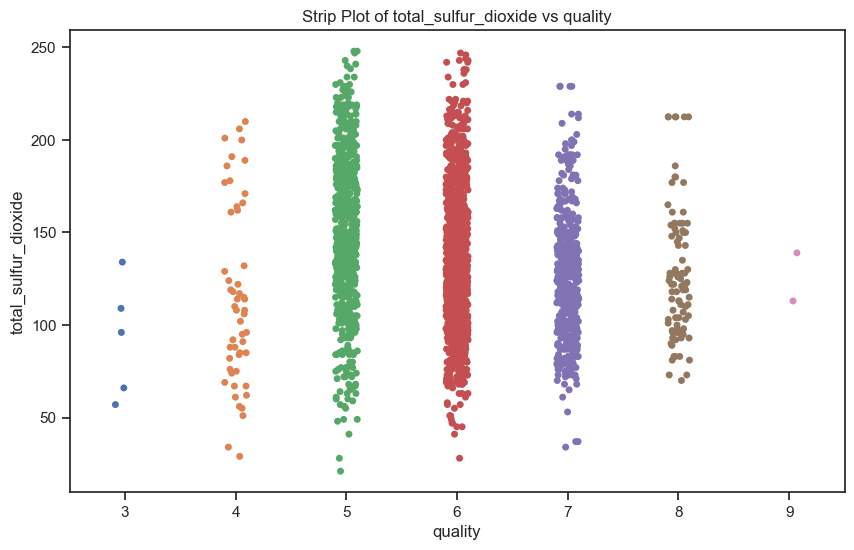

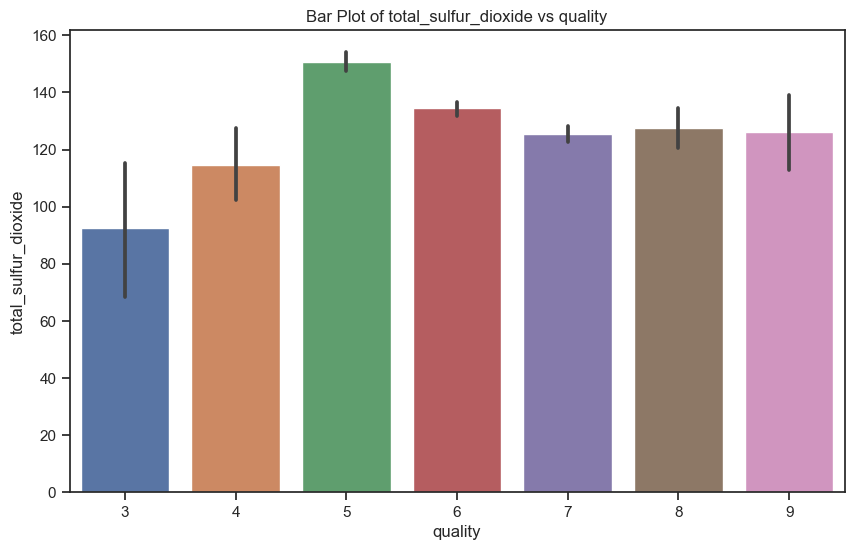

In [44]:
# quality vs. total_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'total_sulfur_dioxide')

In [45]:
# check for normal distribution
stats.shapiro(train.total_sulfur_dioxide)

ShapiroResult(statistic=0.989078938961029, pvalue=1.542586371139354e-12)

In [46]:
# stats test
tstat, pval = stats.ttest_1samp(train.total_sulfur_dioxide, overall_mean)
tstat, pval

(157.78728123428724, 0.0)

In [47]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The total sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a relatively stable trend of total_sulfur_dioxide to quality.

# Is there a relationship between Quality (Categorical) vs. Bound Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and bound sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and bound sulfur dioxide

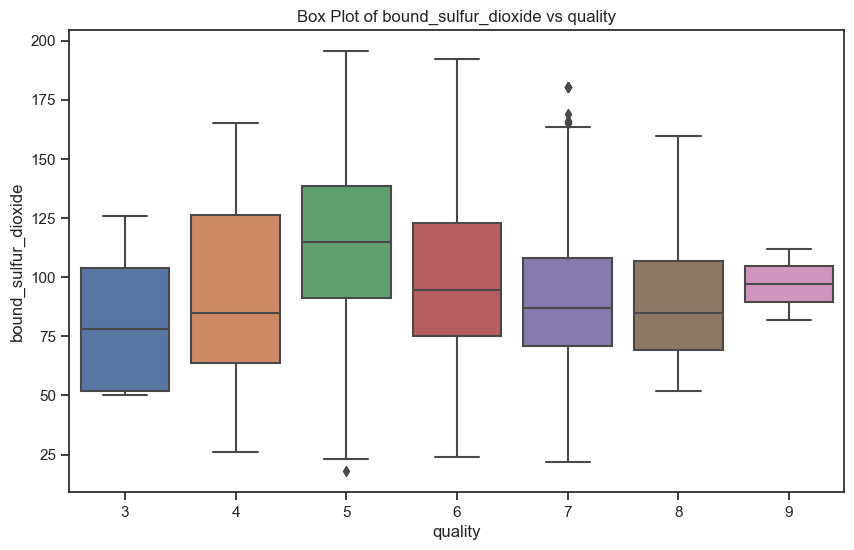

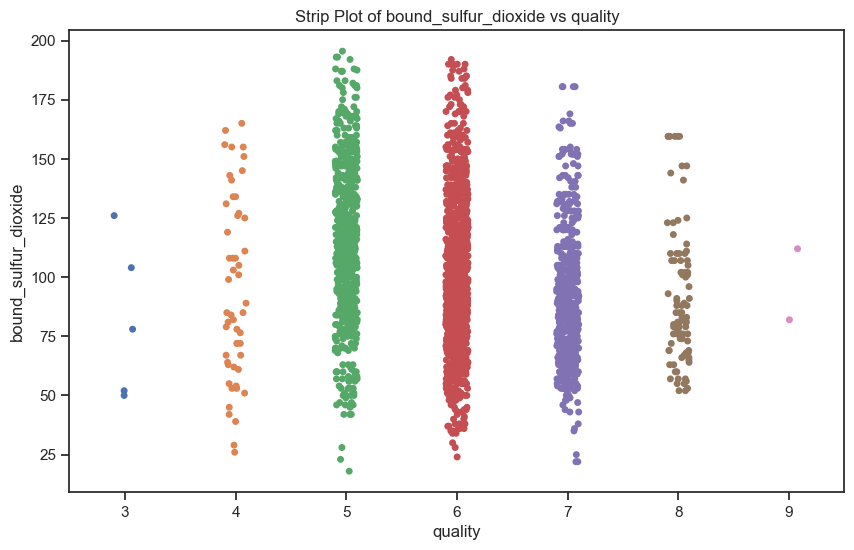

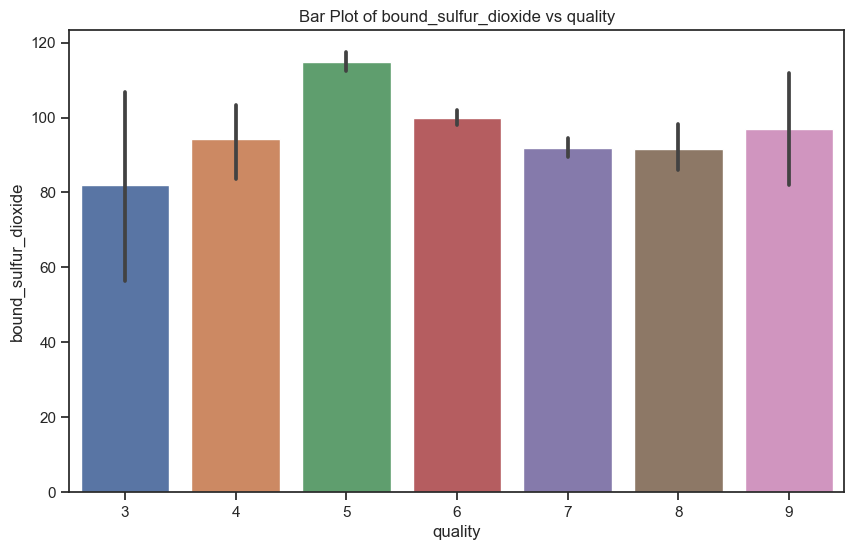

In [48]:
#quality vs. bound_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'bound_sulfur_dioxide')

In [49]:
# check for normal distribution
stats.shapiro(train.bound_sulfur_dioxide)

ShapiroResult(statistic=0.9831025004386902, pvalue=2.952464363063892e-16)

In [50]:
# stats test
tstat, pval = stats.ttest_1samp(train.bound_sulfur_dioxide, overall_mean)
tstat, pval

(140.90246781962608, 0.0)

In [51]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The bound sulfur dioxide variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight decreasing trend of free_sulfur_dioxide to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Density (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and density

$H_{a}$ : there is a relationship between wine quality and density

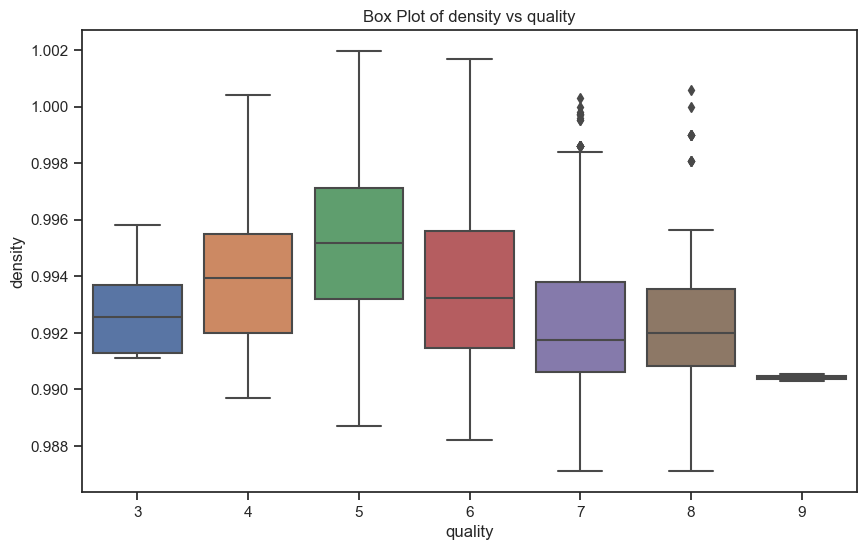

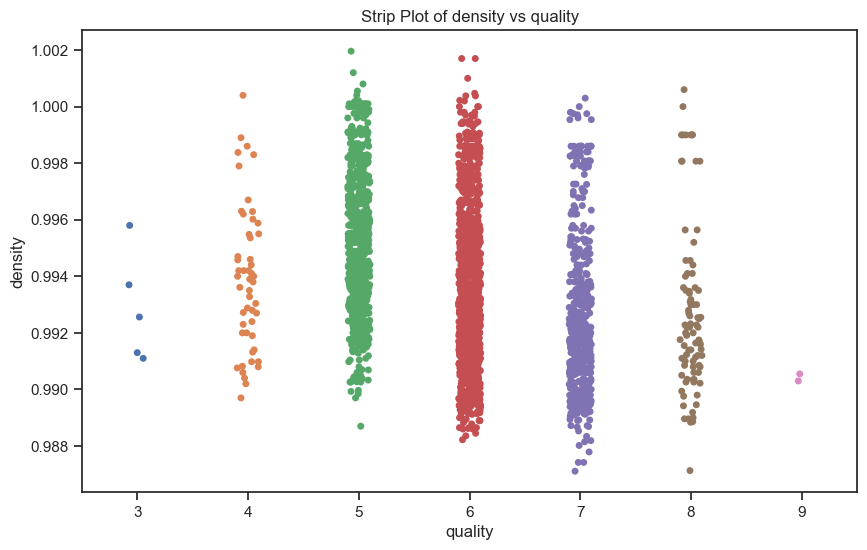

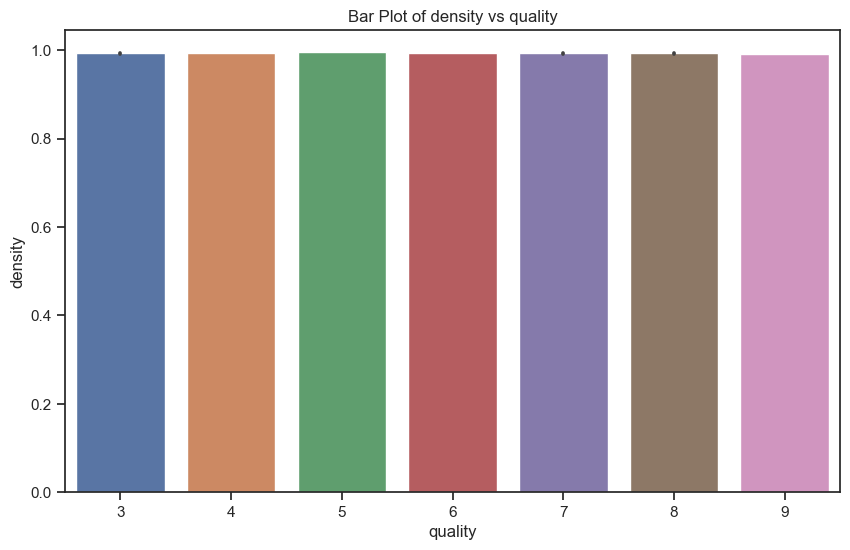

In [52]:
# quality vs. density
exp.plot_categorical_and_continuous_vars(train, 'quality', 'density')

In [53]:
# check for normal distribution
stats.shapiro(train.density)

ShapiroResult(statistic=0.9747142791748047, pvalue=3.645900978051758e-20)

In [54]:
# stats test
tstat, pval = stats.ttest_1samp(train.density, overall_mean)
tstat, pval

(-84304.95014367334, 0.0)

In [55]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free density variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of density to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. pH(Continuous)?

$H_{0}$ : there is not a relationship between wine quality and pH

$H_{a}$ : there is a relationship between wine quality and pH

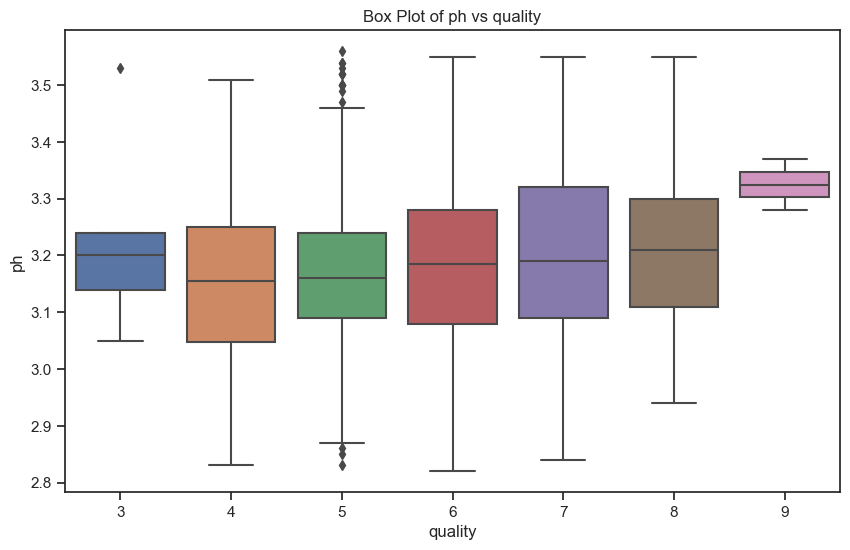

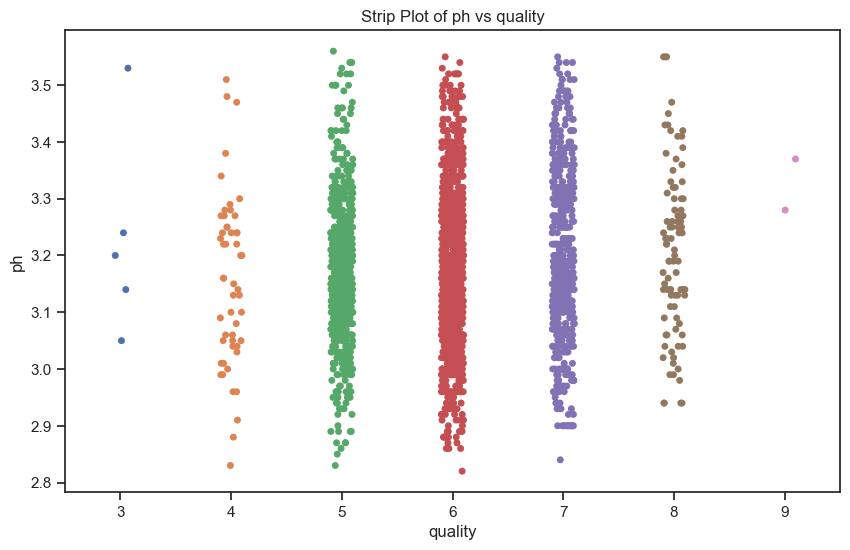

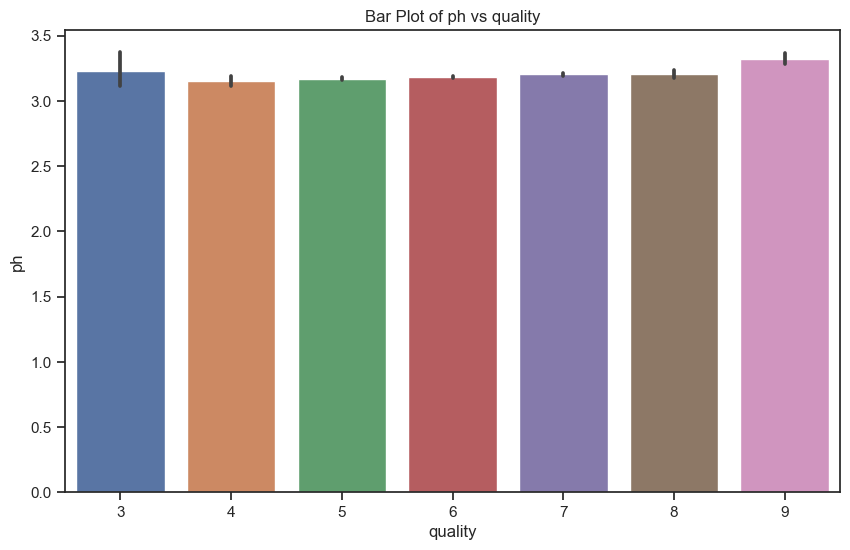

In [56]:
# quality vs. ph
exp.plot_categorical_and_continuous_vars(train, 'quality', 'ph')

In [57]:
# check for normal distribution
stats.shapiro(train.ph)

ShapiroResult(statistic=0.9943198561668396, pvalue=5.786620604908421e-08)

In [58]:
# stats test
tstat, pval = stats.ttest_1samp(train.ph, overall_mean)
tstat, pval

(-976.117333649648, 0.0)

In [59]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The pH variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a bookend of higher pH in the lowest and highest quality rating. The majority of the pH values fall in the middle of our quality spectrum. 

# Is there a relationship between Quality (Categorical) vs. sulphates (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and sulphates

$H_{a}$ : there is a relationship between wine quality and sulphates

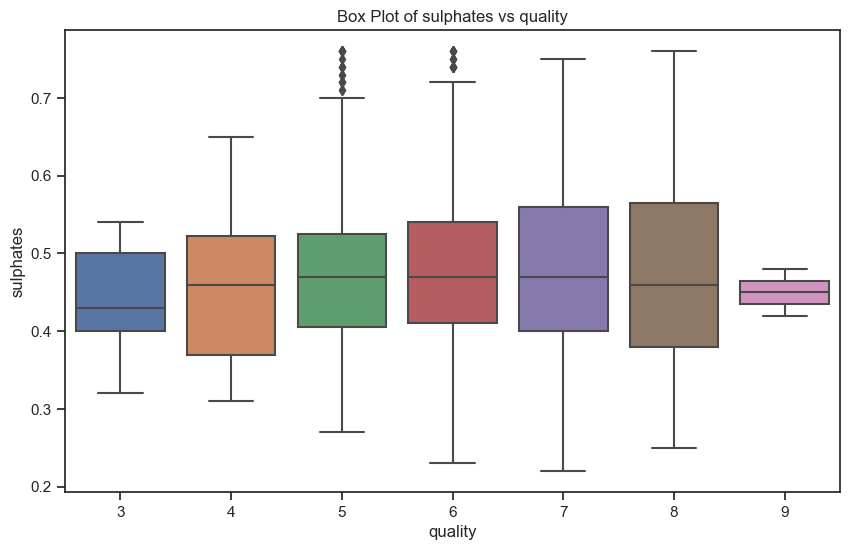

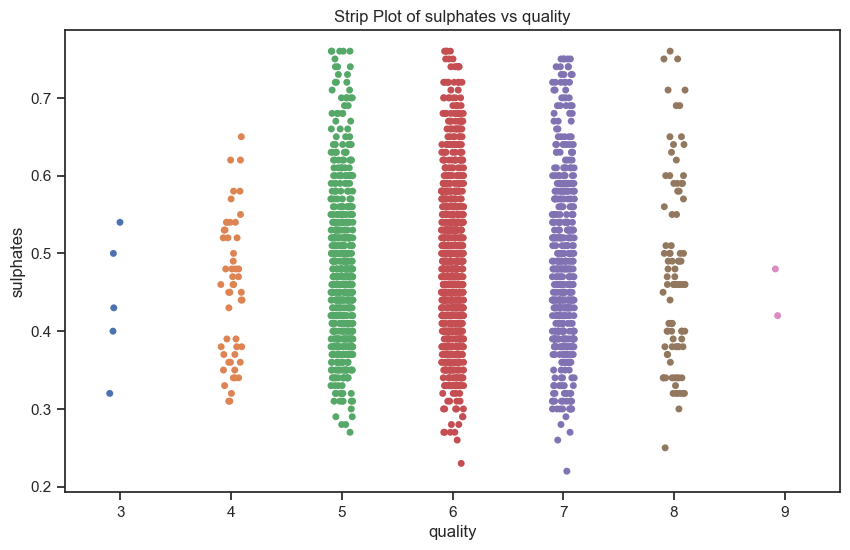

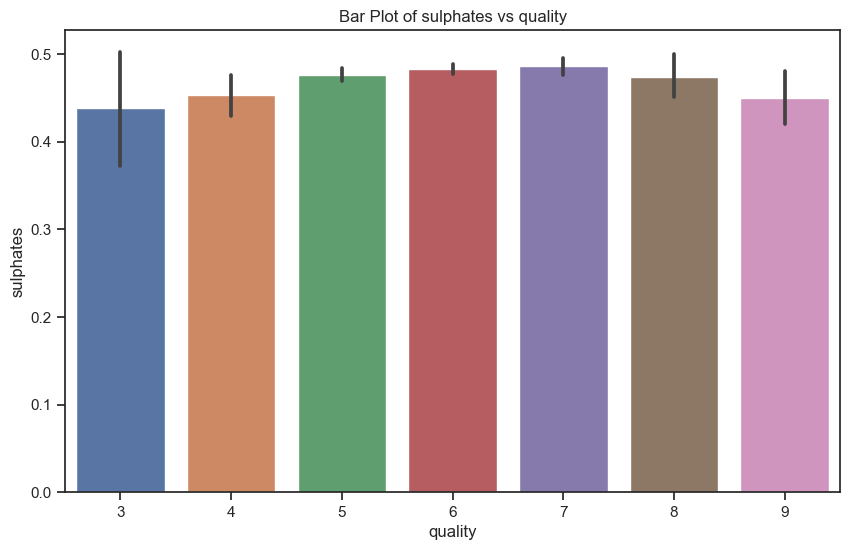

In [60]:
# quality vs. sulphates
exp.plot_categorical_and_continuous_vars(train, 'quality', 'sulphates')

In [61]:
# check for normal distribution
stats.shapiro(train.sulphates)

ShapiroResult(statistic=0.978751540184021, pvalue=2.0164206607623532e-18)

In [62]:
# stats test
tstat, pval = stats.ttest_1samp(train.sulphates, overall_mean)
tstat, pval

(-2669.4001911431205, 0.0)

In [63]:
# p-value print statement
if ((pval) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


- The free sulphates variable is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight bell shaped trend of the mean of sulphates to quality.

# Check out correlation matrix for more data relationship clarification

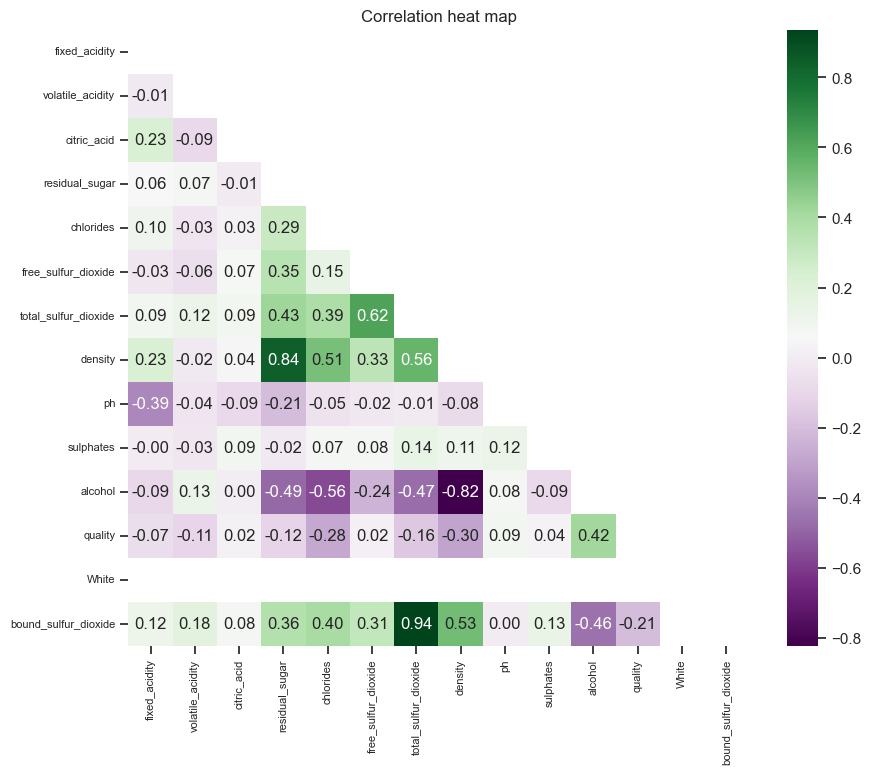

In [64]:
# use a function to take a look at the correlations between the various independent variables. 
#Food for thought, maybe some clutering information can be gathered.

eva.examine_heat_map(train)

- the negative relationship between alcohol and density is interesting
- the negative relationships between white wine and volatile_acidity, and chlorides may be specific to red.
- density and residual sugar have a strong correlation
- density and chlorides have a strong relationship
- total sulfur dioxide has strong correlation with bound, and white wine
- I will explore these relationships potentially in clustering

In [65]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007            6.4              0.25         0.57             1.0      0.062   
2923            6.9              0.22         0.31             6.3      0.029   
1221            5.9              0.40         0.32             6.0      0.034   
1694            7.7              0.12         0.32             1.4      0.060   
4704            6.3              0.36         0.50             8.3      0.053   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4007                 21.0                 122.0  0.99238  3.00       0.40   
2923                 41.0                 131.0  0.99326  3.08       0.49   
1221                 50.0                 127.0  0.99200  3.51       0.58   
1694                 47.0                 150.0  0.99520  3.37       0.42   
4704                 51.0                 202.0  0.99550  3.20       0.51   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
4007      9.5        5  White      1                 101.0  
2923     10.8        6  White      1                  90.0  
1221     12.5        7  White      1                  77.0  
1694      9.2        6  White      1                 103.0  
4704      9.6        6  White      1                 151.0

# Scale data for clustering 


In [66]:
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)

In [67]:
X_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   
...             ...               ...          ...             ...        ...   
1748          0.800          0.469136     0.297872        0.029703   0.517857   
2717          0.500          0.197531     0.404255        0.485149   0.553571   
3403          1.000          0.469136     0.319149        0.217822   0.160714   
4190          0.550          0.345679     0.425532        0.039604   0.446429   
4445          0.050          0.666667     0.319149        0.356436   0.285714   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   
...                   ...                   ...       ...       ...   
1748             0.223684              0.356828  0.389899  0.621622   
2717             0.736842              0.537445  0.543434  0.513514   
3403             0.644737              0.343612  0.362963  0.067568   
4190             0.144737              0.185022  0.184512  0.513514   
4445             0.276316              0.418502  0.356902  0.770270   

      sulphates   alcohol  bound_sulfur_dioxide  
4007   0.333333  0.189655              0.467606  
2923   0.500000  0.413793              0.405634  
1221   0.666667  0.706897              0.332394  
1694   0.370370  0.137931              0.478873  
4704   0.537037  0.206897              0.749296  
...         ...       ...                   ...  
1748   0.370370  0.431034              0.360563  
2717   0.333333  0.413793              0.371831  
3403   0.500000  0.517241              0.163380  
4190   0.203704  0.620690              0.174648  
4445   0.333333  0.500000              0.416901  

[2392 rows x 12 columns]

# Elbow for optimal K
- call out specific features for clustering
- print an Elbow graph to aide K selection

In [68]:
# define independent variables for k-means, carry those on to validate and test
X = X_train_scaled[['alcohol','residual_sugar','density']]
x1 = X_validate_scaled[['alcohol','residual_sugar','density']]
x2 = X_test_scaled[['alcohol','residual_sugar','density']]
X.head()

alcohol  residual_sugar   density
4007  0.189655        0.019802  0.354882
2923  0.413793        0.282178  0.414141
1221  0.706897        0.267327  0.329293
1694  0.137931        0.039604  0.544781
4704  0.206897        0.381188  0.564983

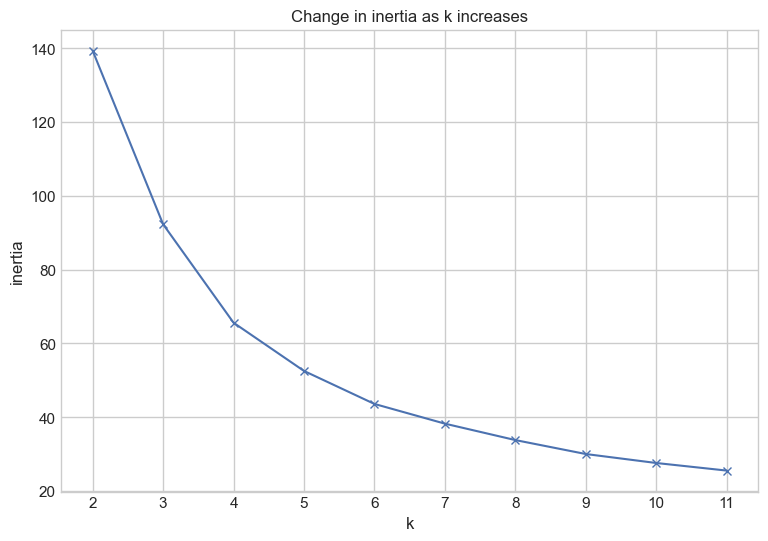

In [69]:
# show Change in inertia graph for k selection
muah.elbow_graph_for_k(X)

# Cluster model 1

In [70]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)
kmeans.predict(x1) #validate
kmeans.predict(x2) #test

array([1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1,

In [71]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['sugar_alcohol_density'] = kmeans.predict(X)

X_validate_scaled['sugar_alcohol_density'] = kmeans.predict(x1)

X_test_scaled['sugar_alcohol_density'] = kmeans.predict(x2)

X['sugar_alcohol_density'] = kmeans.predict(X)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
4007   0.333333  0.189655              0.467606                      2  
2923   0.500000  0.413793              0.405634                      2  
1221   0.666667  0.706897              0.332394                      1

In [72]:
#verify clustering worked for test set
X_validate_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4450          0.525          0.518519     0.319149        0.574257   0.446429   
4798          0.275          0.592593     0.191489        0.688119   0.482143   
2583          0.500          0.246914     0.425532        0.603960   0.839286   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4450             0.342105              0.506608  0.566330  0.310811   
4798             0.447368              0.414097  0.655219  0.459459   
2583             0.210526              0.660793  0.738721  0.243243   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
4450   0.796296  0.344828              0.501408                      0  
4798   0.388889  0.327586              0.338028                      0  
2583   0.555556  0.103448              0.754930                      0

In [73]:
#verify clustering worked for test set
X_test_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3585           0.55          0.395062     0.531915        0.019802   0.303571   
2181           0.65          0.518519     0.319149        0.158416   0.517857   
1143           0.60          0.395062     0.425532        0.049505   0.589286   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
3585             0.513158              0.365639  0.186532  0.459459   
2181             0.355263              0.409692  0.329293  0.391892   
1143             0.315789              0.484581  0.416835  0.581081   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  
3585   0.277778  0.568966              0.247887                      1  
2181   0.333333  0.448276              0.371831                      1  
1143   0.425926  0.362069              0.484507                      2

In [74]:
# calculate cluster centers
kmeans.cluster_centers_

array([[0.18482557, 0.63923919, 0.71513379],
       [0.60014931, 0.12120397, 0.25848255],
       [0.28818839, 0.2161432 , 0.47099049]])

In [75]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:3])
centroids

alcohol  residual_sugar   density
0  0.184826        0.639239  0.715134
1  0.600149        0.121204  0.258483
2  0.288188        0.216143  0.470990

In [76]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 2, 1, ..., 1, 1, 1], dtype=int32)

In [77]:
# doing the things
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density


In [78]:
#rename using map
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density.map({
    0: 'low_sugar, low_alcohol , med_density',
    1: 'high_alcohol, low_sugar, low_density',
    2: 'low_alcohol, high_sugar, high_density'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density  
4007  low_alcohol, high_sugar, high_density  
2923  low_alcohol, high_sugar, high_density  
1221   high_alcohol, low_sugar, low_density  
1694  low_alcohol, high_sugar, high_density  
4704  low_alcohol, high_sugar, high_density

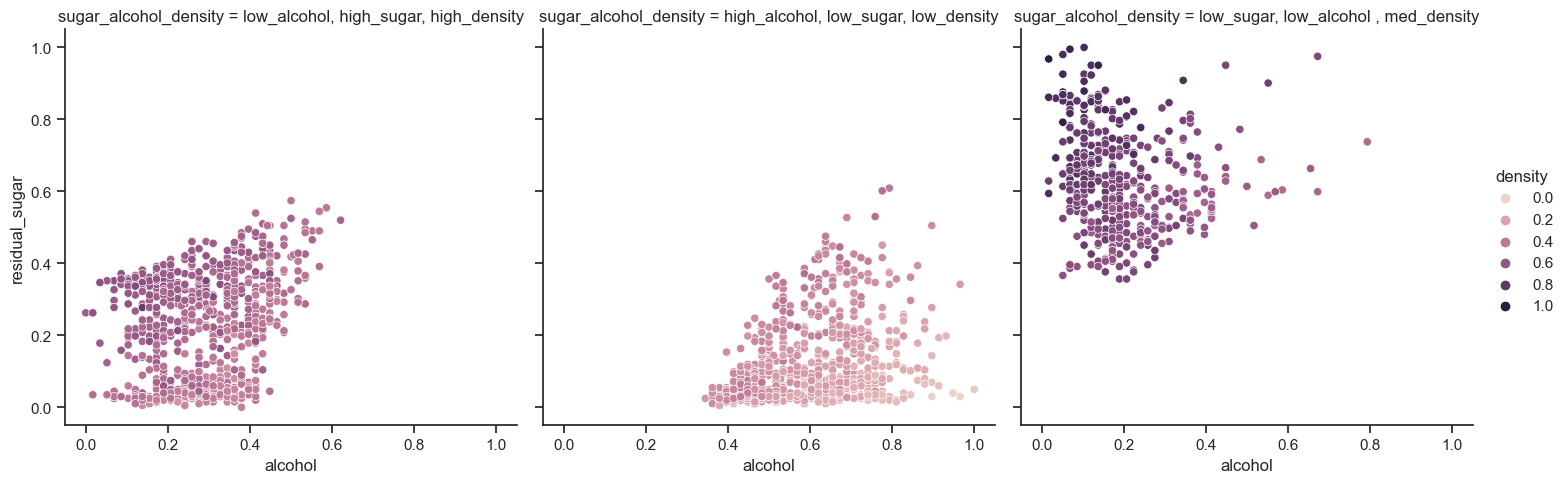

In [79]:
sns.relplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='density', col='sugar_alcohol_density')

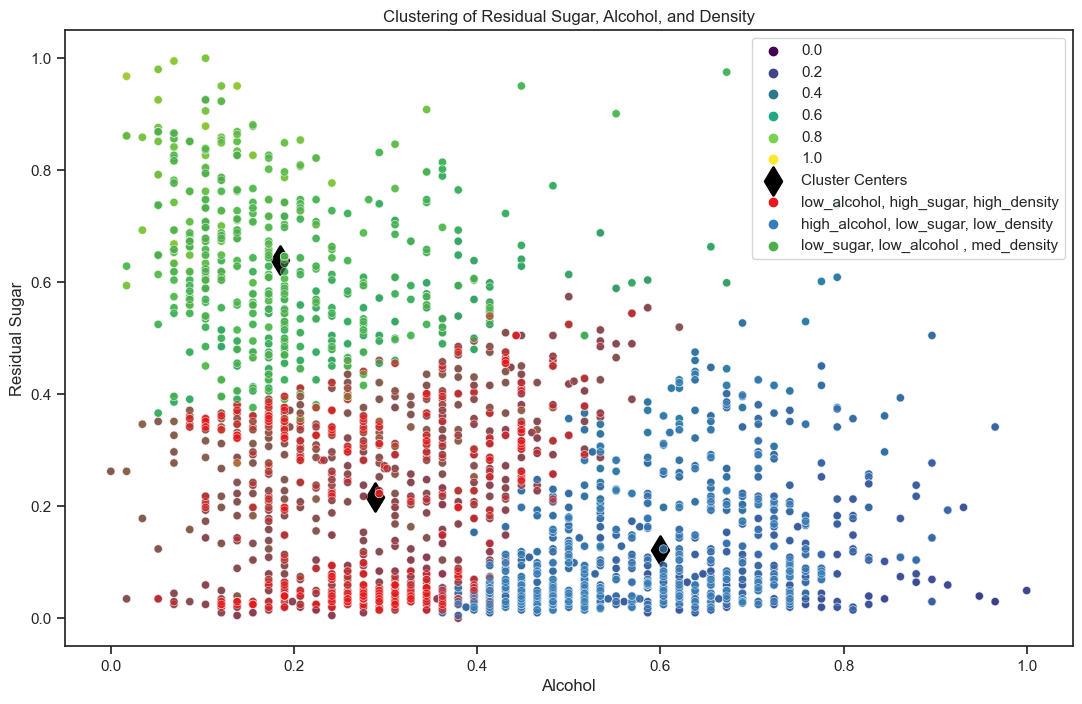

In [80]:
# Scatter plot of unscaled data with hue for cluster
plt.figure(figsize=(13, 8))
sns.scatterplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='density', palette='viridis')

# Plot cluster centers for 'alcohol', 'residual sugar', and 'density'
cluster_centers = kmeans.cluster_centers_ 
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='d', s=200, linewidths=2, label='Cluster Centers')

# Scatter plot of 'sugar_alcohol_density' clusters
sns.scatterplot(x='alcohol', y='residual_sugar', data=X_train_scaled, hue='sugar_alcohol_density', palette='Set1', alpha=0.5)

plt.title('Clustering of Residual Sugar, Alcohol, and Density')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.legend()
plt.show()


In [81]:
# verify kmeans inertia
kmeans.inertia_

92.31668349653754

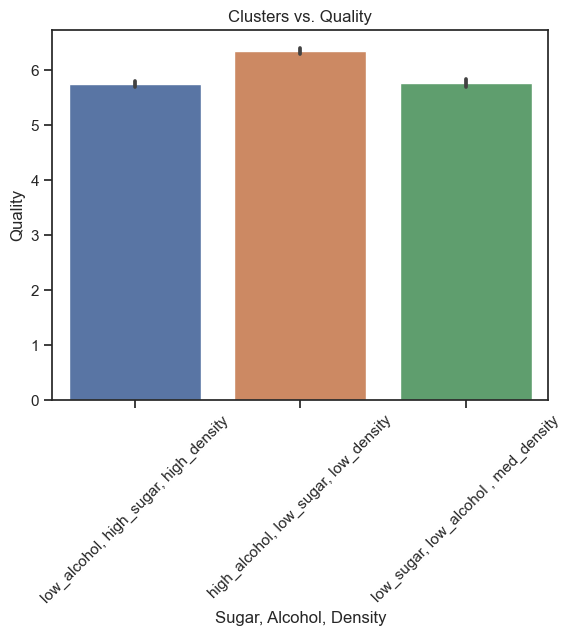

In [82]:
#visualize clusters vs. target
sns.barplot(data=X_train_scaled, x='sugar_alcohol_density', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Sugar, Alcohol, Density')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 1 takeaway
- Three clusters were created, they appear to have a relationship with quality.
- The cluster will be used as a feature in modeling.

# Cluster model 2

- call out specific features for clustering
- print an Elbow graph to aide K selection

In [83]:
# define independent variables for k-means, carry those on to validate and test
X1 = X_train_scaled[['chlorides','sulphates']]
x2 = X_validate_scaled[['chlorides','sulphates']]
x3 = X_test_scaled[['chlorides','sulphates']]
X1.head()

chlorides  sulphates
4007   0.839286   0.333333
2923   0.250000   0.500000
1221   0.339286   0.666667
1694   0.803571   0.370370
4704   0.678571   0.537037

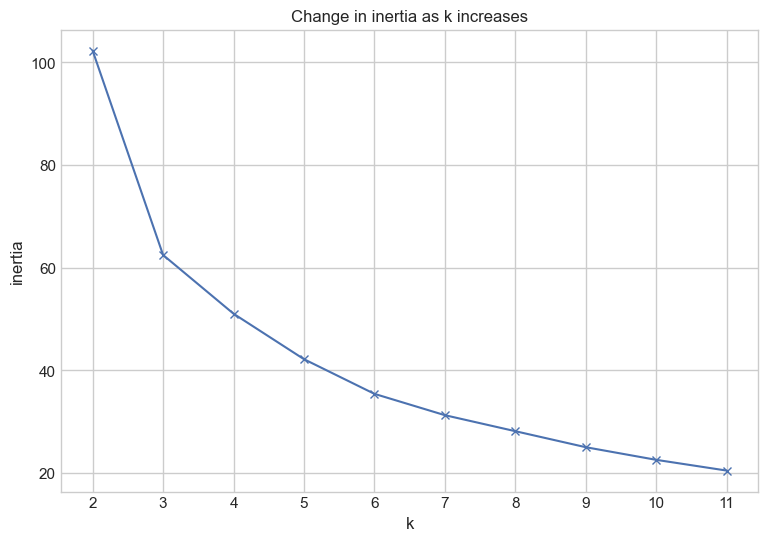

In [84]:
# view elbow method selection for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [85]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X1)

# USE (predict using) the thing 
kmeans.predict(X1)
kmeans.predict(x2) #validate
kmeans.predict(x3) #test

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0,
       1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2,

In [86]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['chlorides_sulphates'] = kmeans.predict(X1)

X_validate_scaled['chlorides_sulphates'] = kmeans.predict(x2)

X_test_scaled['chlorides_sulphates'] = kmeans.predict(x3)

X['chlorides_sulphates'] = kmeans.predict(X1)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   

                      sugar_alcohol_density  chlorides_sulphates  
4007  low_alcohol, high_sugar, high_density                    1  
2923  low_alcohol, high_sugar, high_density                    0  
1221   high_alcohol, low_sugar, low_density                    2

In [87]:
# calculate cluster centers
kmeans.cluster_centers_

array([[0.34501661, 0.34127907],
       [0.6584898 , 0.44941799],
       [0.44006849, 0.71106038]])

In [88]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X1.columns[:2])
centroids

chlorides  sulphates
0   0.345017   0.341279
1   0.658490   0.449418
2   0.440068   0.711060

In [89]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 0, 2, ..., 0, 0, 0], dtype=int32)

In [90]:
# ensure saved to df
X_train_scaled['chlorides_sulphates'] = X_train_scaled.chlorides_sulphates
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density  chlorides_sulphates  
4007  low_alcohol, high_sugar, high_density                    1  
2923  low_alcohol, high_sugar, high_density                    0  
1221   high_alcohol, low_sugar, low_density                    2  
1694  low_alcohol, high_sugar, high_density                    1  
4704  low_alcohol, high_sugar, high_density                    1

In [91]:
#rename using map
X_train_scaled['chlorides_sulphates'] = X_train_scaled.chlorides_sulphates.map({
    0: 'low_chloride, low_sulphate',
    1: 'low_chloride, high_sulphate',
    2: 'high_chloride, high_sulphate'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density           chlorides_sulphates  
4007  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate  
2923  low_alcohol, high_sugar, high_density    low_chloride, low_sulphate  
1221   high_alcohol, low_sugar, low_density  high_chloride, high_sulphate  
1694  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate  
4704  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate

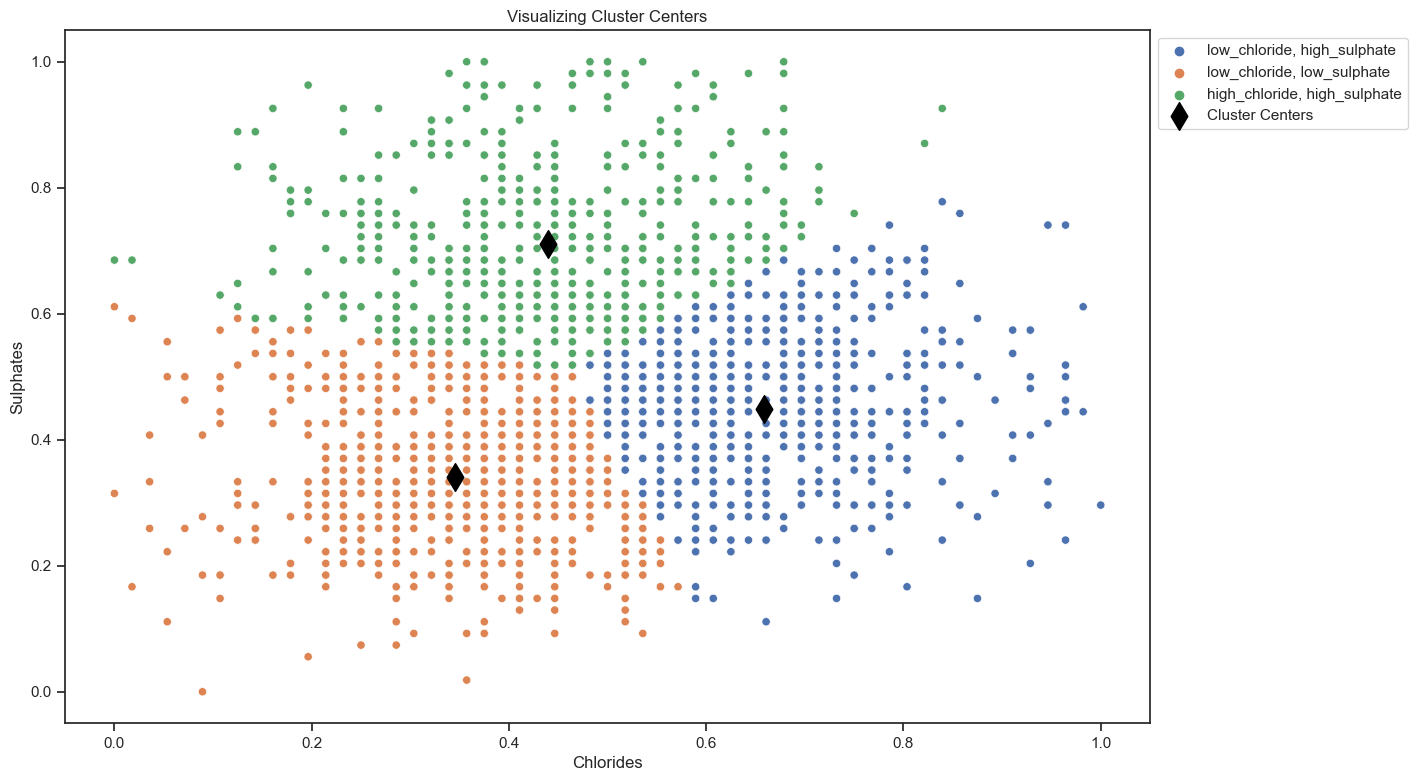

In [92]:
# Visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# Scatter plot of data with hue for cluster
sns.scatterplot(x='chlorides', y='sulphates', data=X_train_scaled, hue='chlorides_sulphates')

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X1.columns[:2])

# Plot cluster centers (centroids)
plt.scatter(centroids['chlorides'], centroids['sulphates'], c='black', marker='d', s=200, label='Cluster Centers')

plt.title('Visualizing Cluster Centers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Sulphates')
plt.xlabel('Chlorides')
plt.show()

In [93]:
# verify kmeans inertia
kmeans.inertia_

62.486786734311224

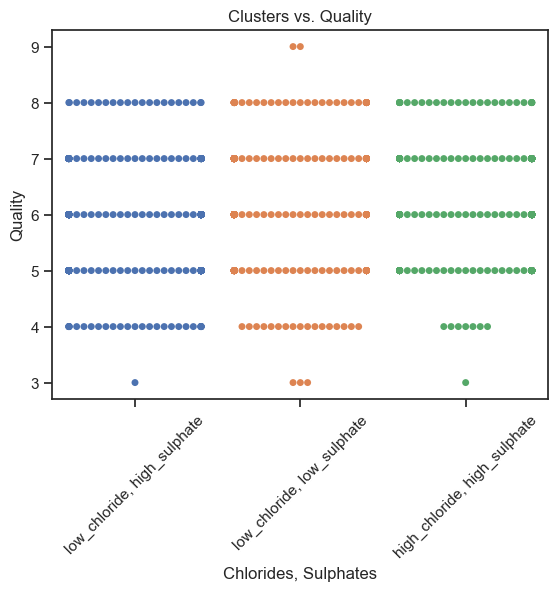

In [94]:
#visualize clusters vs. target
sns.swarmplot(data=X_train_scaled, x='chlorides_sulphates', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Chlorides, Sulphates')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 2 takeaway
- Although three clusters were created, it was only grouping by a randomly chosen mean of an area.
- The cluster are not adequate to move into modeling as a feature

# Cluster Model 3

- call out specific features for clustering
- print an Elbow graph to aide K selection

In [95]:
# define independent variables for k-means, carry those on to validate and test
X2 = X_train_scaled[['fixed_acidity','bound_sulfur_dioxide']]
x4 = X_validate_scaled[['fixed_acidity','bound_sulfur_dioxide']]
x5 = X_test_scaled[['fixed_acidity','bound_sulfur_dioxide']]
X2.head()

fixed_acidity  bound_sulfur_dioxide
4007          0.400              0.467606
2923          0.525              0.405634
1221          0.275              0.332394
1694          0.725              0.478873
4704          0.375              0.749296

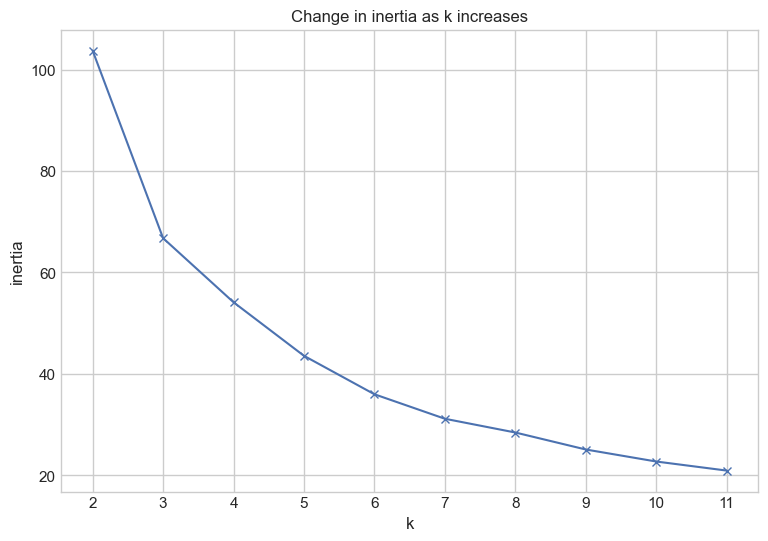

In [96]:
# view elbow method selection for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [97]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X2)

# USE (predict using) the thing 
kmeans.predict(X2)
kmeans.predict(x4) #validate
kmeans.predict(x5) #test

array([1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2,
       2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1,
       1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0,
       2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1,

In [98]:
# make new column names in X_train_scaled, X_validate_scaled, X_test_scale and X dataframe
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(X2)

X_validate_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(x4)

X_test_scaled['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(x5)

X['fixed_acidity_bound_sulfur_dioxide'] = kmeans.predict(X2)

# verify clustering worked for train set
X_train_scaled.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   

                      sugar_alcohol_density           chlorides_sulphates  \
4007  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
2923  low_alcohol, high_sugar, high_density    low_chloride, low_sulphate   
1221   high_alcohol, low_sugar, low_density  high_chloride, high_sulphate   

      fixed_acidity_bound_sulfur_dioxide  
4007                                   2  
2923                                   1  
1221                                   2

In [99]:
kmeans.cluster_centers_

array([[0.53859707, 0.69292029],
       [0.68286765, 0.37316073],
       [0.34832031, 0.36901115]])

In [100]:
# Make a dataframe 
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns[:2])
centroids

fixed_acidity  bound_sulfur_dioxide
0       0.538597              0.692920
1       0.682868              0.373161
2       0.348320              0.369011

In [101]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([2, 1, 2, ..., 1, 1, 2], dtype=int32)

In [102]:
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = X_train_scaled.fixed_acidity_bound_sulfur_dioxide
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density           chlorides_sulphates  \
4007  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
2923  low_alcohol, high_sugar, high_density    low_chloride, low_sulphate   
1221   high_alcohol, low_sugar, low_density  high_chloride, high_sulphate   
1694  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
4704  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

      fixed_acidity_bound_sulfur_dioxide  
4007                                   2  
2923                                   1  
1221                                   2  
1694                                   1  
4704                                   0

In [103]:
#rename using map
X_train_scaled['fixed_acidity_bound_sulfur_dioxide'] = X_train_scaled.fixed_acidity_bound_sulfur_dioxide.map({
    0: 'low_fixed_acidity, low_bound_sulfur_dioxide',
    1: 'high_fixed_acidity, med_bound_sulfur_dioxide',
    2: 'low_fixed_acidity, high_bound_sulfur_dioxide'
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density           chlorides_sulphates  \
4007  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
2923  low_alcohol, high_sugar, high_density    low_chloride, low_sulphate   
1221   high_alcohol, low_sugar, low_density  high_chloride, high_sulphate   
1694  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
4704  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
4007  low_fixed_acidity, high_bound_sulfur_dioxide  
2923  high_fixed_acidity, med_bound_sulfur_dioxide  
1221  low_fixed_acidity, high_bound_sulfur_dioxide  
1694  high_fixed_acidity, med_bound_sulfur_dioxide  
4704   low_fixed_acidity, low_bound_sulfur_dioxide

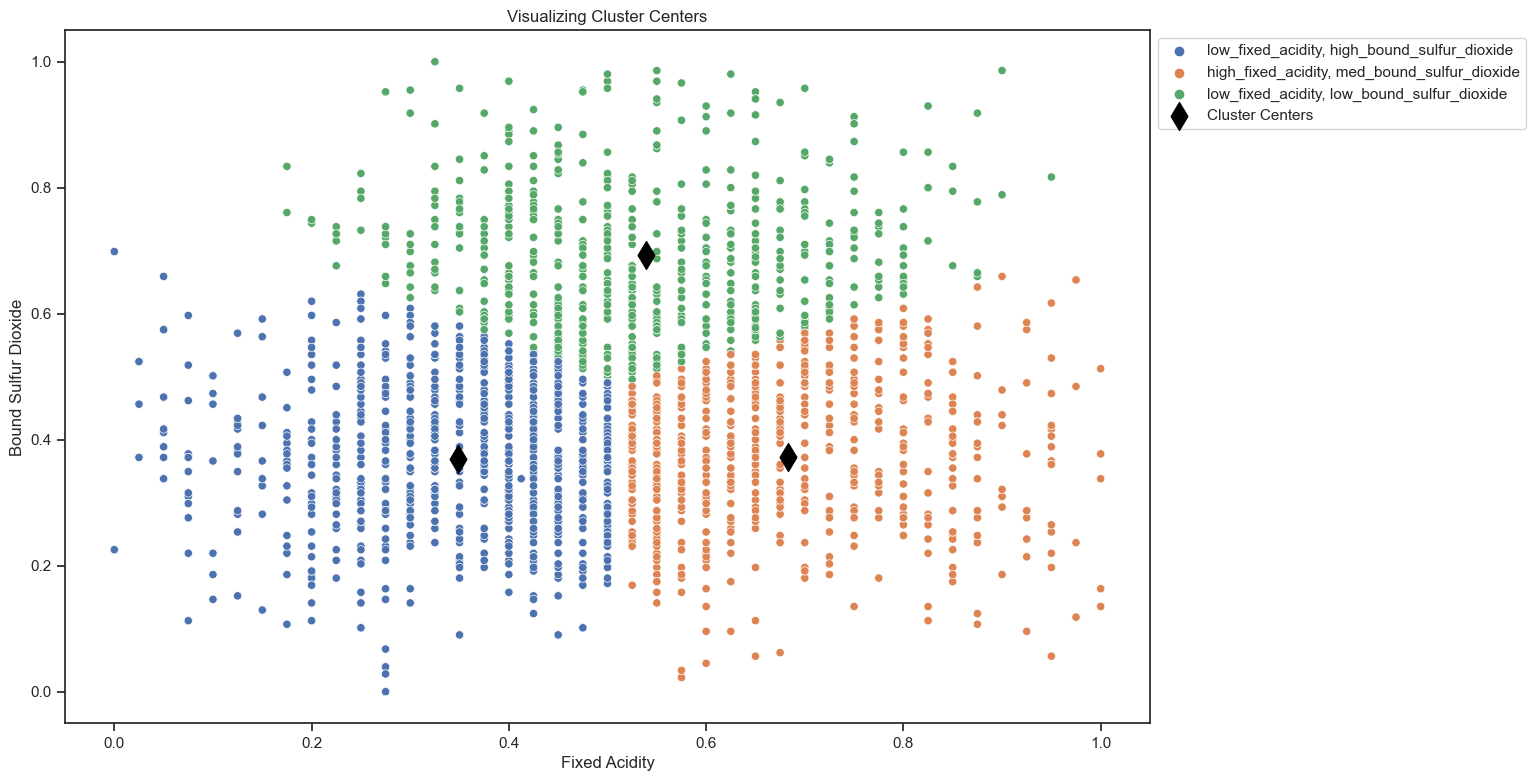

In [104]:
# Visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# Scatter plot of data with hue for cluster
sns.scatterplot(x='fixed_acidity', y='bound_sulfur_dioxide', data=X_train_scaled, hue='fixed_acidity_bound_sulfur_dioxide')

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X2.columns[:2])

# Plot cluster centers (centroids)
plt.scatter(centroids['fixed_acidity'], centroids['bound_sulfur_dioxide'], c='black', marker='d', s=200, label='Cluster Centers')

plt.title('Visualizing Cluster Centers')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Bound Sulfur Dioxide')
plt.xlabel('Fixed Acidity')
plt.show()

In [105]:
# verify kmeans inertia
kmeans.inertia_

66.75371261424341

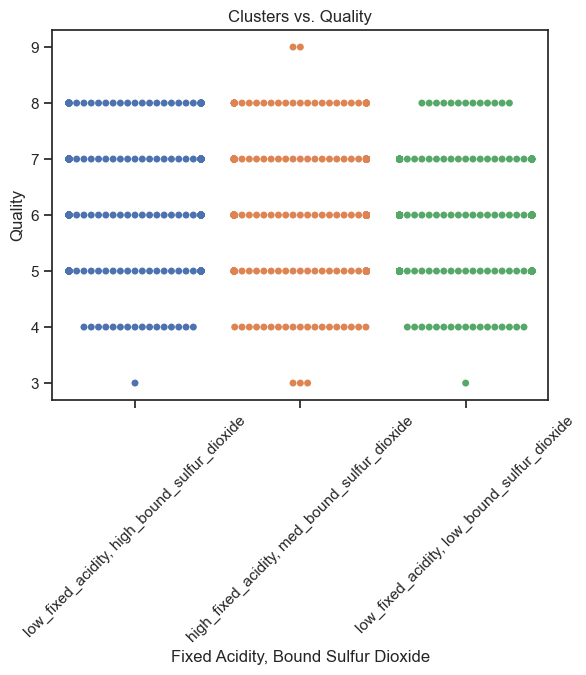

In [106]:
#visualize clusters vs. target
sns.swarmplot(data=X_train_scaled, x='fixed_acidity_bound_sulfur_dioxide', y=y_train)
plt.xticks(rotation= 45)
plt.xlabel('Fixed Acidity, Bound Sulfur Dioxide')
plt.ylabel('Quality')
plt.title('Clusters vs. Quality')
plt.show()

#### Cluster Model 3 takeaway
- Although three clusters were created, it was only grouping by a randomly chosen mean of an area.
- The cluster are not adequate to move into modeling as a feature

# Modeling
- establish baseline
- run features through modeling
- classification measured on accuracy
    - decision tree
    - random forest
    - KNN
    - logistic regression

# clean X_train_scaled, etc... for modeling
- remove columns attached to new cluster
- remove columns not being sent into models



In [107]:
# check out data
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  \
4007   0.333333  0.189655              0.467606   
2923   0.500000  0.413793              0.405634   
1221   0.666667  0.706897              0.332394   
1694   0.370370  0.137931              0.478873   
4704   0.537037  0.206897              0.749296   

                      sugar_alcohol_density           chlorides_sulphates  \
4007  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
2923  low_alcohol, high_sugar, high_density    low_chloride, low_sulphate   
1221   high_alcohol, low_sugar, low_density  high_chloride, high_sulphate   
1694  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   
4704  low_alcohol, high_sugar, high_density   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
4007  low_fixed_acidity, high_bound_sulfur_dioxide  
2923  high_fixed_acidity, med_bound_sulfur_dioxide  
1221  low_fixed_acidity, high_bound_sulfur_dioxide  
1694  high_fixed_acidity, med_bound_sulfur_dioxide  
4704   low_fixed_acidity, low_bound_sulfur_dioxide

In [108]:
#rename using map
X_train_scaled['sugar_alcohol_density'] = X_train_scaled.sugar_alcohol_density.map({
     'low_sugar, low_alcohol , med_density': 0,
     'high_alcohol, low_sugar, low_density': 1,
     'low_alcohol, high_sugar, high_density': 2
    
})
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4007          0.400          0.419753     1.000000        0.019802   0.839286   
2923          0.525          0.345679     0.446809        0.282178   0.250000   
1221          0.275          0.790123     0.468085        0.267327   0.339286   
1694          0.725          0.098765     0.468085        0.039604   0.803571   
4704          0.375          0.691358     0.851064        0.381188   0.678571   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
4007             0.236842              0.444934  0.354882  0.243243   
2923             0.500000              0.484581  0.414141  0.351351   
1221             0.618421              0.466960  0.329293  0.932432   
1694             0.578947              0.568282  0.544781  0.743243   
4704             0.631579              0.797357  0.564983  0.513514   

      sulphates   alcohol  bound_sulfur_dioxide  sugar_alcohol_density  \
4007   0.333333  0.189655              0.467606                      2   
2923   0.500000  0.413793              0.405634                      2   
1221   0.666667  0.706897              0.332394                      1   
1694   0.370370  0.137931              0.478873                      2   
4704   0.537037  0.206897              0.749296                      2   

               chlorides_sulphates  \
4007   low_chloride, high_sulphate   
2923    low_chloride, low_sulphate   
1221  high_chloride, high_sulphate   
1694   low_chloride, high_sulphate   
4704   low_chloride, high_sulphate   

                fixed_acidity_bound_sulfur_dioxide  
4007  low_fixed_acidity, high_bound_sulfur_dioxide  
2923  high_fixed_acidity, med_bound_sulfur_dioxide  
1221  low_fixed_acidity, high_bound_sulfur_dioxide  
1694  high_fixed_acidity, med_bound_sulfur_dioxide  
4704   low_fixed_acidity, low_bound_sulfur_dioxide

In [110]:
X_train_scaled = X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','sugar_alcohol_density']]
X_validate_scaled = X_validate_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','sugar_alcohol_density']]
X_test_scaled = X_test_scaled[['fixed_acidity', 'volatile_acidity','citric_acid','chlorides'
                     ,'free_sulfur_dioxide','ph','sulphates'
                     ,'bound_sulfur_dioxide','sugar_alcohol_density']]
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
4007          0.400          0.419753     1.000000   0.839286   
2923          0.525          0.345679     0.446809   0.250000   
1221          0.275          0.790123     0.468085   0.339286   
1694          0.725          0.098765     0.468085   0.803571   
4704          0.375          0.691358     0.851064   0.678571   

      free_sulfur_dioxide        ph  sulphates  bound_sulfur_dioxide  \
4007             0.236842  0.243243   0.333333              0.467606   
2923             0.500000  0.351351   0.500000              0.405634   
1221             0.618421  0.932432   0.666667              0.332394   
1694             0.578947  0.743243   0.370370              0.478873   
4704             0.631579  0.513514   0.537037              0.749296   

      sugar_alcohol_density  
4007                      2  
2923                      2  
1221                      1  
1694                      2  
4704                      2

In [111]:
X_validate_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
4450          0.525          0.518519     0.319149   0.446429   
4798          0.275          0.592593     0.191489   0.482143   
2583          0.500          0.246914     0.425532   0.839286   
2134          0.500          0.444444     0.468085   0.464286   
670           0.750          0.839506     0.340426   0.767857   

      free_sulfur_dioxide        ph  sulphates  bound_sulfur_dioxide  \
4450             0.342105  0.310811   0.796296              0.501408   
4798             0.447368  0.459459   0.388889              0.338028   
2583             0.210526  0.243243   0.555556              0.754930   
2134             0.460526  0.581081   0.555556              0.349296   
670              0.407895  0.432432   0.611111              0.828169   

      sugar_alcohol_density  
4450                      0  
4798                      0  
2583                      0  
2134                      2  
670                       0

In [112]:
# baseline
y_train.value_counts()

6    1086
5     643
7     513
8      91
4      52
3       5
9       2
Name: quality, dtype: int64

In [113]:
#set baseline accuracy
(y_train == 6).mean()

0.4540133779264214

### Decision tree
- will use decision tree classifier function to run through train and validate and graph the results

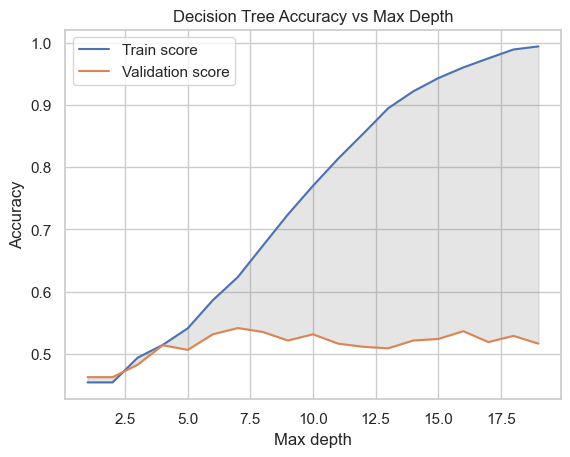

max_depth  train_acc   val_acc  score_diff
0           1   0.454013  0.462406   -0.008393
1           2   0.454013  0.462406   -0.008393
2           3   0.493729  0.482456    0.011273
3           4   0.514214  0.513784    0.000430
4           5   0.540970  0.506266    0.034704
5           6   0.586120  0.531328    0.054792
6           7   0.623328  0.541353    0.081974
7           8   0.673913  0.535088    0.138825
8           9   0.724080  0.521303    0.202777
9          10   0.770067  0.531328    0.238739
10         11   0.813545  0.516291    0.297254
11         12   0.853679  0.511278    0.342401
12         13   0.894649  0.508772    0.385877
13         14   0.921823  0.521303    0.400519
14         15   0.943144  0.523810    0.419334
15         16   0.960284  0.536341    0.423943
16         17   0.974916  0.518797    0.456119
17         18   0.989130  0.528822    0.460308
18         19   0.994147  0.516291    0.477856

In [114]:
muah.decision_tree(X_train_scaled, X_validate_scaled, y_train, y_validate)

- Results of max depth 4 will be used to compare to other modeling techniques.

# Random Forest
- will use Random Forest function to run through train and validate and graph the results

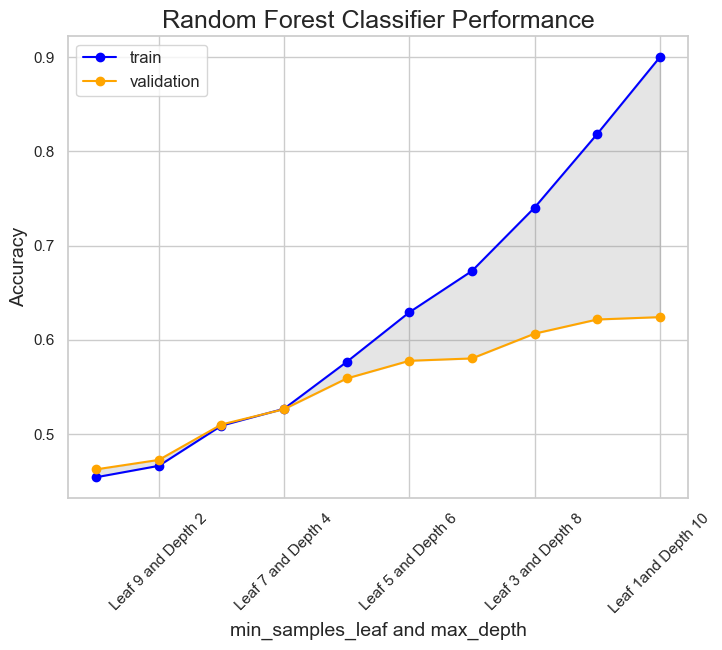

min_samples_leaf  max_depth  train_score  validate_score  diff_score
0                 1         10     0.900084        0.624060    0.276023
1                 2          9     0.818562        0.621554    0.197008
2                 3          8     0.740385        0.606516    0.133868
3                 4          7     0.673077        0.580201    0.092876
4                 5          6     0.629181        0.577694    0.051486
5                 6          5     0.576505        0.558897    0.017608
6                 7          4     0.526756        0.526316    0.000440
7                 8          3     0.508779        0.510025   -0.001246
8                 9          2     0.466137        0.472431   -0.006294
9                10          1     0.454013        0.462406   -0.008393

In [115]:
#run random forest function and graph results
muah.random_forest_scores(X_train_scaled, y_train, X_validate_scaled, y_validate)

- Results of min_sample_leaf 8 and max_depth 3 will be used to compare to other modeling techniques.

# KNN
- will use KNN function to run through train and validate and graph the results

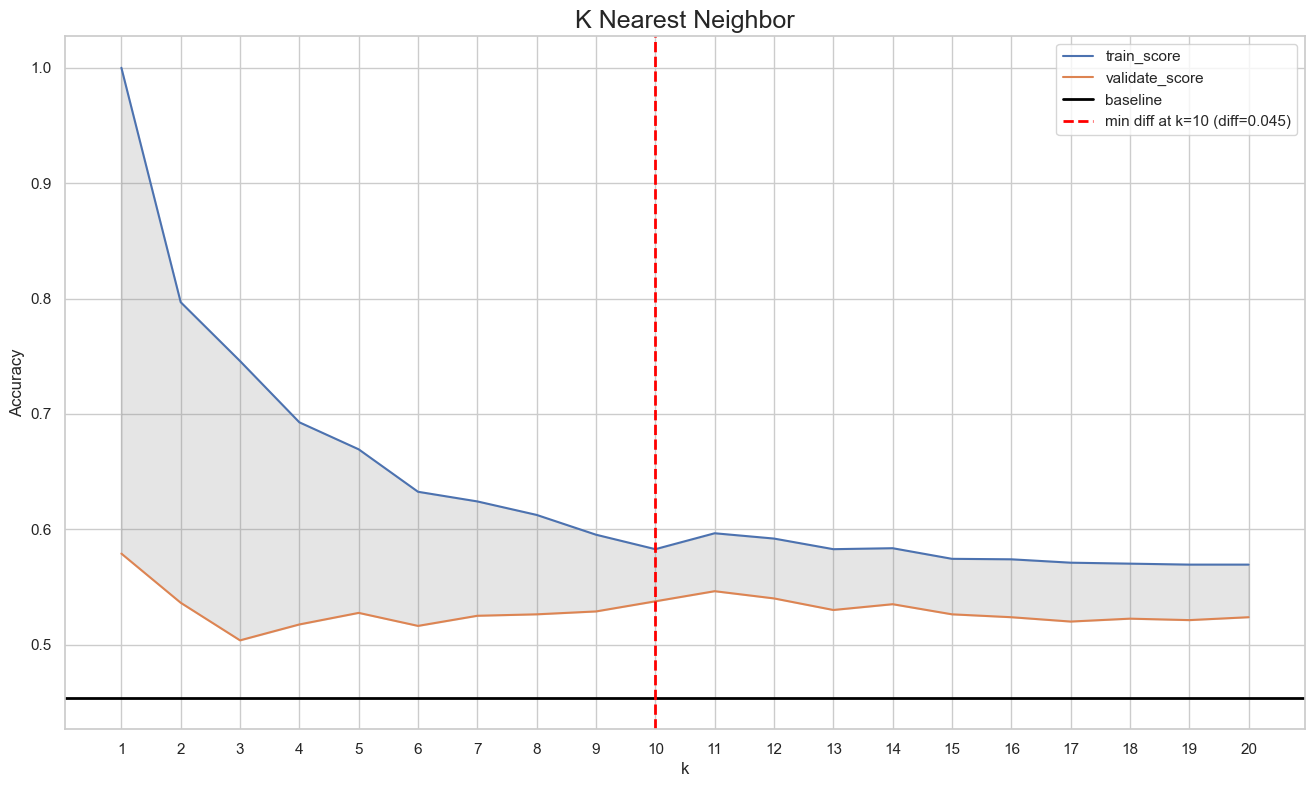

k  train_score  validate_score  diff_score
0    1     1.000000        0.578947    0.421053
1    2     0.796823        0.536341    0.260482
2    3     0.745819        0.503759    0.242060
3    4     0.692726        0.517544    0.175182
4    5     0.669314        0.527569    0.141745
5    6     0.632525        0.516291    0.116234
6    7     0.624164        0.525063    0.099101
7    8     0.612458        0.526316    0.086142
8    9     0.595318        0.528822    0.066496
9   10     0.582776        0.537594    0.045182
10  11     0.596572        0.546366    0.050206
11  12     0.591973        0.540100    0.051873
12  13     0.582776        0.530075    0.052701
13  14     0.583612        0.535088    0.048524
14  15     0.574415        0.526316    0.048099
15  16     0.573997        0.523810    0.050187
16  17     0.571070        0.520050    0.051020
17  18     0.570234        0.522556    0.047678
18  19     0.569398        0.521303    0.048095
19  20     0.569398        0.523810    0.045588

In [116]:
k.k_nearest2(X_train_scaled, y_train, X_validate_scaled, y_validate)

- Results of k=19 will be used to compare to other modeling techniques.

# Logistic Regression
- I ran the data through iterations of C = 0.01, 0.1, 1, 10, 100, and 1000 

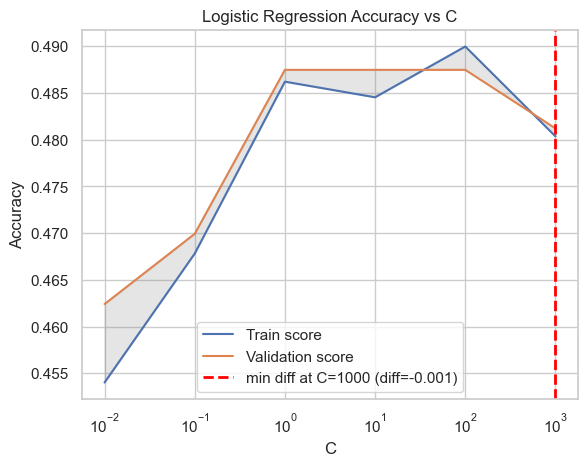

C  train_score  validate_score  diff_score
0     0.01     0.454013        0.462406   -0.008393
1     0.10     0.467809        0.469925   -0.002115
2     1.00     0.486204        0.487469   -0.001265
3    10.00     0.484532        0.487469   -0.002937
4   100.00     0.489967        0.487469    0.002498
5  1000.00     0.480351        0.481203   -0.000852

In [117]:
muah.plot_logistic_regression(X_train_scaled, X_validate_scaled, y_train, y_validate)

- Results of C = 0.1 will be used to compare to other modeling techniques.

# Choose a model
- based on the following summary:

- Baseline accuracy: 0.453

- Decision Tree (max_depth = 4)
    - train: 0.537234	
    - validate: 0.512463
    - difference: 0.024771

- Random Forest (min_samples_leaf = 8, max_depth = 3)
    - train: 0.533		
    - validate: 0.520
    - difference: 0.013

- KNN (k = 19)
    - train: 0.587		
    - validate: 0.561
    - difference: 0.026

- Logistic Regression (C=0.1)
    - train: 0.494		
    - validate: 0.495
    - difference: -0.00083

All models performed better than baseline. Out of the 4 models, the KNN performed the best in both the train and validate iterations. Therefore, I chose KNN as my model of choice for this project. The test data is ran on the model below:

# Run KNN on test data

In [118]:
# Run function to test the test data on KNN model
muah.the_chosen_one(X_train_scaled, X_test_scaled, y_train, y_test)

0.5476190476190477

- The test model scored 55% which is 10 points better than the baseline!!!

# Summary/Conclusion:
- The following data analysis pipeline categories were accomplished (Acquire, Prepare, Explore(with clustering), Model) we found that alcohol, sugar, and density were high drivers of predicting quality.

- We selected the KNN (K nearest neighbors). The decision was made based on highest accuracy score with least amount of difference between train and validate data sets.
- The KNN performed slightly better than baseline, so we may need to look at other factors that are not available in the dataset like aroma, legs, and taste. 

# Recommendations:
- All of the selected features contributed to the predicting the quality of wine.  
    - Collect more data on red wines. The data set was 1 sided with 75% of the data being white wines. 
        - Diversity in the data would create a better data environment for prediction accuracy. 
        - Higher alcohol and lower sugar seems to drive quality, not by much but a noticeable difference. 

# Next steps:
- With more time, further combination of clusters may create features that create a model with more predictive power.
    - Analyzing the relationships between multiple features in relation to quality could improve the model. 
    - Even though the selected features affect quality, their relationships to other factors may direct where we want to focus efforts in predicting quality.